<a href="https://colab.research.google.com/github/drfperez/lightkurve/blob/main/Lightkurve3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-2-9e7a02f675be>:21: LightkurveDeprecationWarning: The search_lightcurvefile function is deprecated and may be removed in a future version.
        Use search_lightcurve() instead.
  search_result = lk.search_lightcurvefile(target)  # Cercar arxius de corba de llum per l'estrella


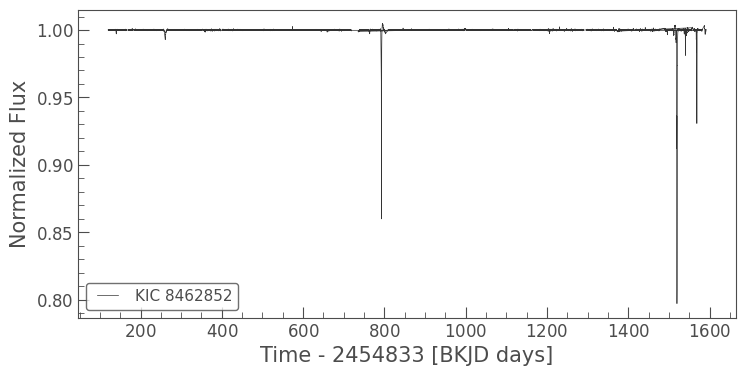

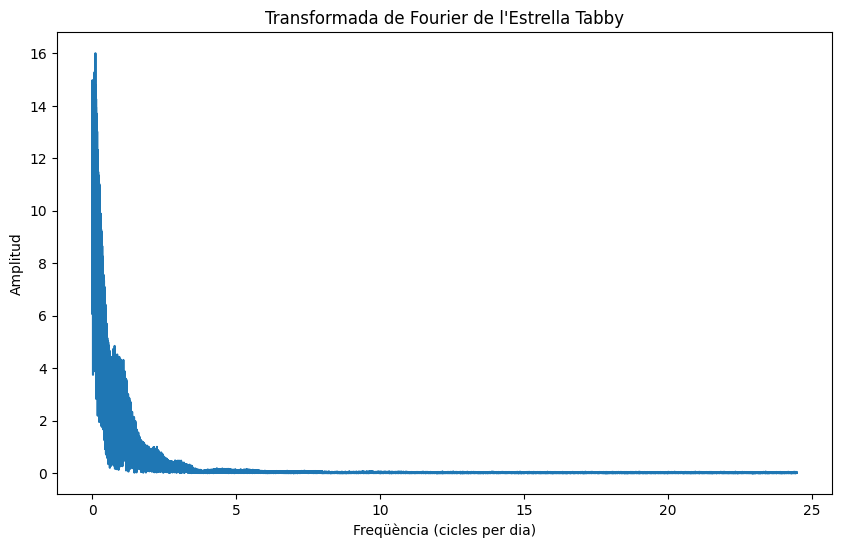

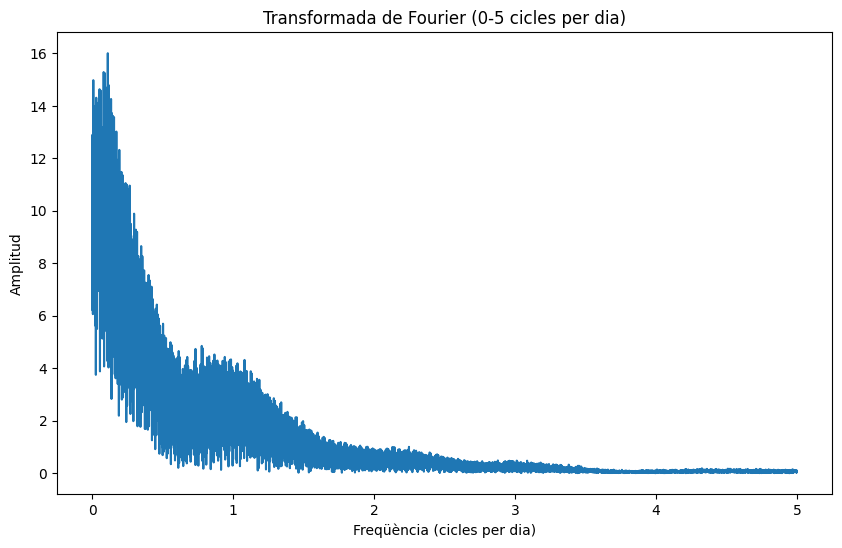

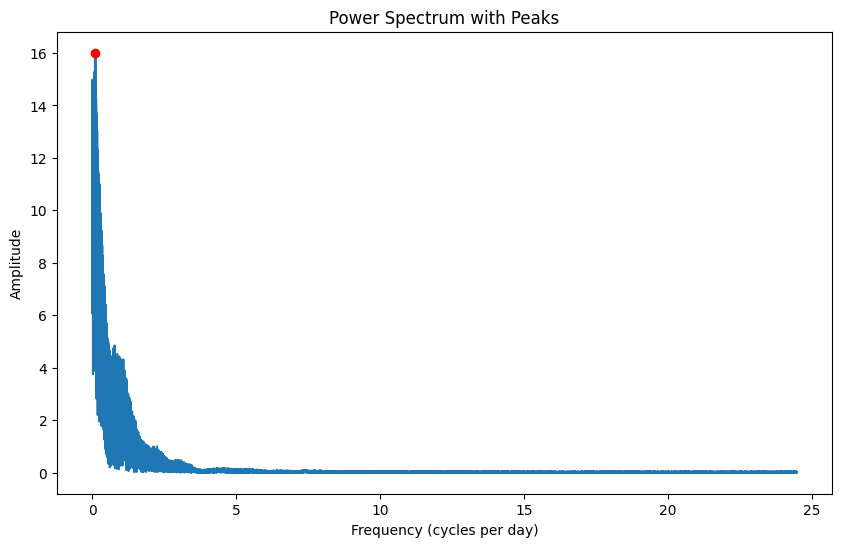

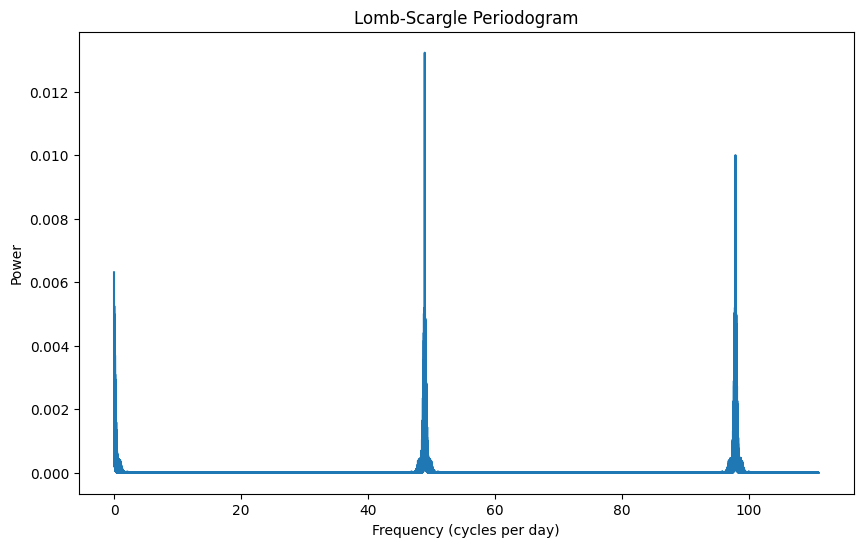

In [2]:

# Instal·lació de Lightkurve i altres biblioteques necessàries
!pip install lightkurve numpy matplotlib

# Importar les biblioteques necessàries
import lightkurve as lk
import numpy as np
import matplotlib.pyplot as plt

'''
La transformada de Fourier (TF) és una tècnica matemàtica que transforma una funció del domini del temps
a una funció del domini de les freqüències. En el context d'una corba de llum astronòmica,
la TF permet identificar les components freqüencials de les variacions de la lluminositat
de l'estrella. Això és útil per detectar periodicitats o cicles en les dades, que poden
indicar fenòmens físics com la presència d'exoplanetes, estrelles binàries, o altres fenòmens
astrofísics. La TF descompon la corba de llum en una suma de sinusoides amb diferents
freqüències i amplituds.
'''

# Descarregar les dades de Kepler per l'estrella Tabby
target = "KIC 8462852"  # Definir l'objectiu, l'estrella Tabby
search_result = lk.search_lightcurvefile(target)  # Cercar arxius de corba de llum per l'estrella

# Baixar els fitxers de corba de llum
lc_collection = search_result.download_all()  # Descarregar tots els arxius de corba de llum trobats

# Unir totes les corbes de llum en una sola
lc = lc_collection.stitch()  # Combinar totes les corbes de llum en una única corba contínua

# Eliminar valors NaN i normalitzar la corba de llum
lc = lc.remove_nans().normalize()  # Eliminar valors NaN i normalitzar la corba per a una millor anàlisi

# Eliminar tendències llargues amb un filtre Savitzky-Golay
lc_detrended = lc.flatten(window_length=401)  # Aplicar un filtre per eliminar tendències de llarg termini

# Visualitzar la corba de llum processada
lc_detrended.plot()  # Gràfic de la corba de llum processada
plt.show()  # Mostrar el gràfic

# Aplicar la Transformada de Fourier
fft = np.fft.fft(lc_detrended.flux)  # Calcular la TF de la corba de llum
frequencies = np.fft.fftfreq(len(fft), lc_detrended.time[1].value - lc_detrended.time[0].value)  # Calcular les freqüències corresponents

# Filtrar les freqüències positives
positive_frequencies = frequencies[frequencies > 0]  # Filtrar per obtenir només les freqüències positives
positive_fft = np.abs(fft[frequencies > 0])  # Obtenir l'amplitud de les components de freqüència positives

# Visualitzar el resultat de la Transformada de Fourier
plt.figure(figsize=(10, 6))  # Definir la mida de la figura
plt.plot(positive_frequencies, positive_fft)  # Gràfic de l'espectre de freqüències
plt.xlabel("Freqüència (cicles per dia)")  # Etiqueta de l'eix X
plt.ylabel("Amplitud")  # Etiqueta de l'eix Y
plt.title("Transformada de Fourier de l'Estrella Tabby")  # Títol del gràfic
plt.show()  # Mostrar el gràfic

# Ampliar l'àrea entre 0 i 5 cicles per dia
plt.figure(figsize=(10, 6))  # Definir la mida de la figura
mask = (positive_frequencies > 0) & (positive_frequencies <= 5)  # Crear una màscara per seleccionar el rang de freqüències desitjat
plt.plot(positive_frequencies[mask], positive_fft[mask])  # Gràfic de l'espectre de freqüències per al rang seleccionat
plt.xlabel("Freqüència (cicles per dia)")  # Etiqueta de l'eix X
plt.ylabel("Amplitud")  # Etiqueta de l'eix Y
plt.title("Transformada de Fourier (0-5 cicles per dia)")  # Títol del gràfic
plt.show()  # Mostrar el gràfic

# Apply the Fourier Transform
fft = np.fft.fft(lc_detrended.flux)
frequencies = np.fft.fftfreq(len(fft), lc_detrended.time[1].value - lc_detrended.time[0].value)

# Filter positive frequencies
positive_frequencies = frequencies[frequencies > 0]
positive_fft = np.abs(fft[frequencies > 0])

# Peak detection using SciPy's `argrelextrema`
from scipy.signal import argrelextrema
peaks = np.where(positive_fft == np.max(positive_fft))[0]

#peaks = argrelextrema(positive_fft, np.greater)[0]
peak_frequencies = positive_frequencies[peaks]
peak_amplitudes = positive_fft[peaks]

# Lomb-Scargle periodogram
from astropy.timeseries import LombScargle
ls = LombScargle(lc_detrended.time, lc_detrended.flux)
frequency, power = ls.autopower()

# Plot the power spectrum with peaks marked
plt.figure(figsize=(10, 6))
plt.plot(positive_frequencies, positive_fft)
plt.plot(peak_frequencies, peak_amplitudes, 'ro')  # mark peaks with red dots
plt.xlabel("Frequency (cycles per day)")
plt.ylabel("Amplitude")
plt.title("Power Spectrum with Peaks")
plt.show()

# Plot the Lomb-Scargle periodogram
plt.figure(figsize=(10, 6))
plt.plot(frequency, power)
plt.xlabel("Frequency (cycles per day)")
plt.ylabel("Power")
plt.title("Lomb-Scargle Periodogram")
plt.show()

<ipython-input-3-a9b497a42fc0>:15: LightkurveDeprecationWarning: The search_lightcurvefile function is deprecated and may be removed in a future version.
        Use search_lightcurve() instead.
  search_result = lk.search_lightcurvefile(target)


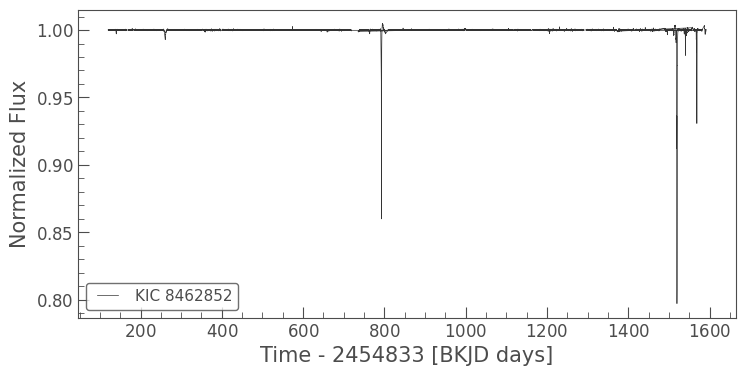

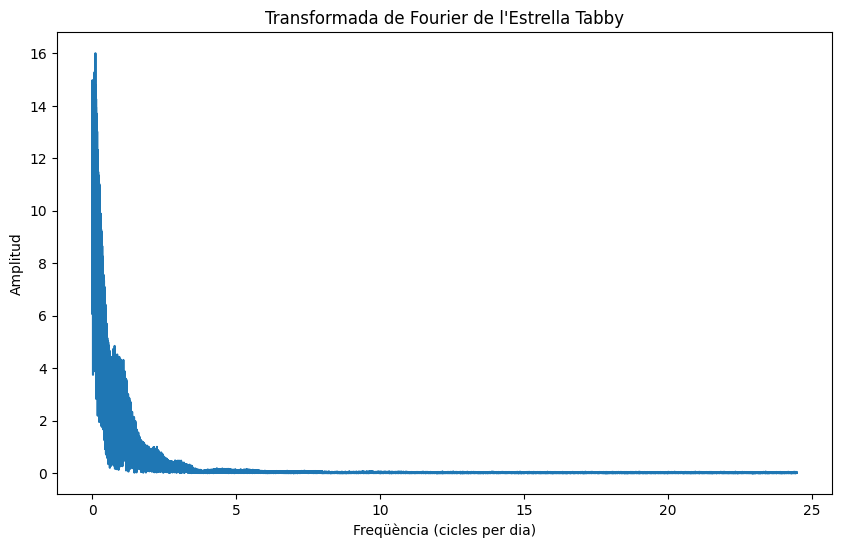

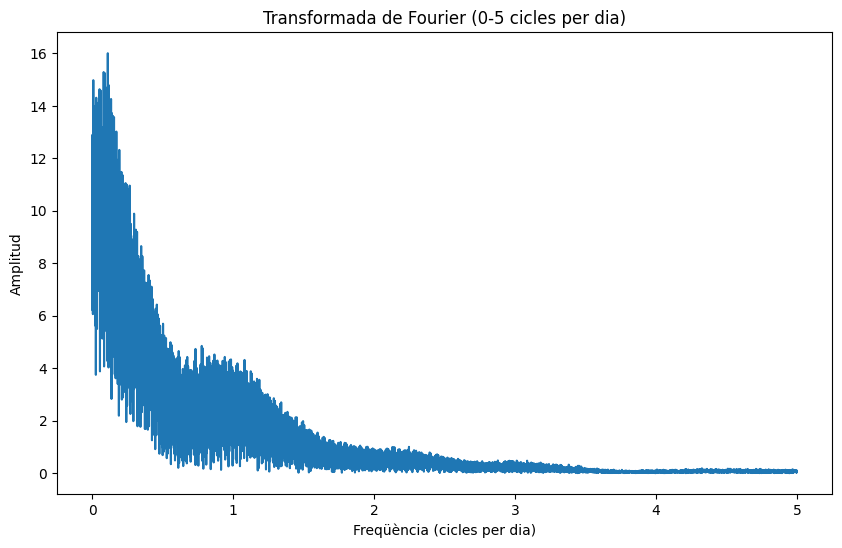

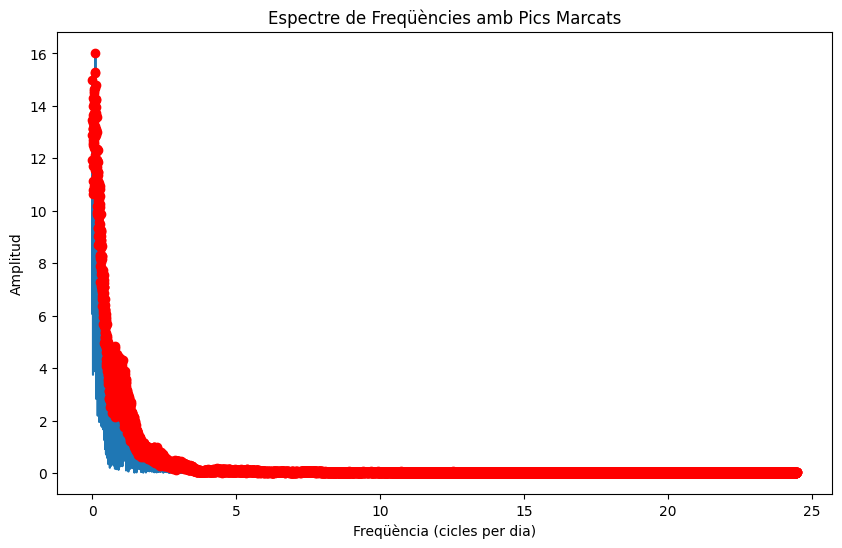

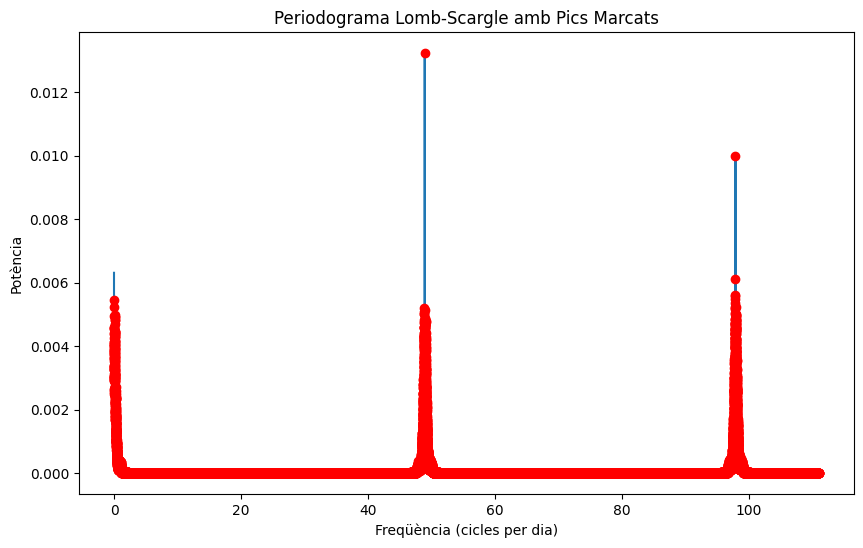

In [3]:

# Instal·lació de Lightkurve i altres biblioteques necessàries
!pip install lightkurve numpy matplotlib scipy

# Importar les biblioteques necessàries
import lightkurve as lk
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from astropy.timeseries import LombScargle

# Definir l'objectiu, l'estrella Tabby
target = "KIC 8462852"

# Cercar arxius de corba de llum per l'estrella i descarregar tots els arxius trobats
search_result = lk.search_lightcurvefile(target)
lc_collection = search_result.download_all()

# Combinar totes les corbes de llum en una única corba contínua
lc = lc_collection.stitch()

# Eliminar valors NaN i normalitzar la corba de llum
lc = lc.remove_nans().normalize()

# Eliminar tendències llargues amb un filtre Savitzky-Golay
lc_detrended = lc.flatten(window_length=401)

# Visualitzar la corba de llum processada
lc_detrended.plot()
plt.show()

# Aplicar la Transformada de Fourier
fft = np.fft.fft(lc_detrended.flux)
frequencies = np.fft.fftfreq(len(fft), lc_detrended.time[1].value - lc_detrended.time[0].value)

# Filtrar les freqüències positives
positive_frequencies = frequencies[frequencies > 0]
positive_fft = np.abs(fft[frequencies > 0])

# Visualitzar l'espectre de freqüències
plt.figure(figsize=(10, 6))
plt.plot(positive_frequencies, positive_fft)
plt.xlabel("Freqüència (cicles per dia)")
plt.ylabel("Amplitud")
plt.title("Transformada de Fourier de l'Estrella Tabby")
plt.show()

# Ampliar l'àrea entre 0 i 5 cicles per dia
plt.figure(figsize=(10, 6))
mask = (positive_frequencies > 0) & (positive_frequencies <= 5)
plt.plot(positive_frequencies[mask], positive_fft[mask])
plt.xlabel("Freqüència (cicles per dia)")
plt.ylabel("Amplitud")
plt.title("Transformada de Fourier (0-5 cicles per dia)")
plt.show()

# Detecció de pics en l'espectre de Fourier
peaks, _ = find_peaks(positive_fft)
peak_frequencies = positive_frequencies[peaks]
peak_amplitudes = positive_fft[peaks]

# Visualitzar l'espectre de freqüències amb els pics marcats
plt.figure(figsize=(10, 6))
plt.plot(positive_frequencies, positive_fft)
plt.plot(peak_frequencies, peak_amplitudes, 'ro')
plt.xlabel("Freqüència (cicles per dia)")
plt.ylabel("Amplitud")
plt.title("Espectre de Freqüències amb Pics Marcats")
plt.show()

# Aplicar el periodograma Lomb-Scargle
ls = LombScargle(lc_detrended.time, lc_detrended.flux)
frequency, power = ls.autopower()

# Detecció de pics en el periodograma Lomb-Scargle
peaks_ls, _ = find_peaks(power)
peak_frequencies_ls = frequency[peaks_ls]
peak_powers_ls = power[peaks_ls]

# Visualitzar el periodograma Lomb-Scargle amb els pics marcats
plt.figure(figsize=(10, 6))
plt.plot(frequency, power)
plt.plot(peak_frequencies_ls, peak_powers_ls, 'ro')
plt.xlabel("Freqüència (cicles per dia)")
plt.ylabel("Potència")
plt.title("Periodograma Lomb-Scargle amb Pics Marcats")
plt.show()

<ipython-input-4-6eb4bfba6c24>:15: LightkurveDeprecationWarning: The search_lightcurvefile function is deprecated and may be removed in a future version.
        Use search_lightcurve() instead.
  search_result = lk.search_lightcurvefile(target)


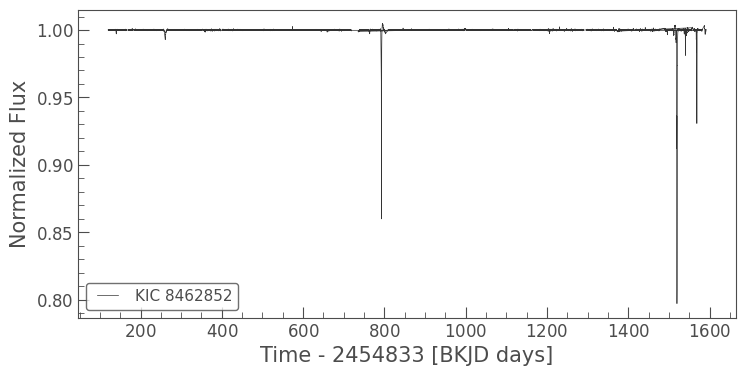

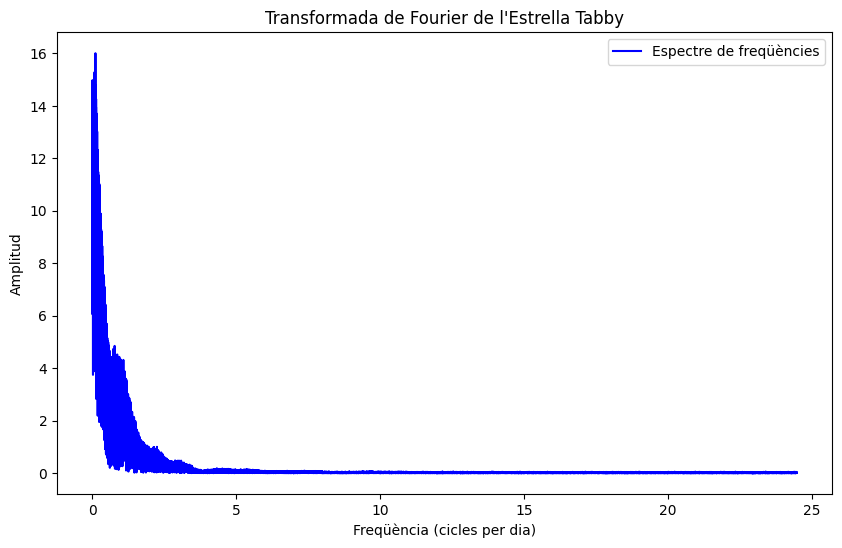

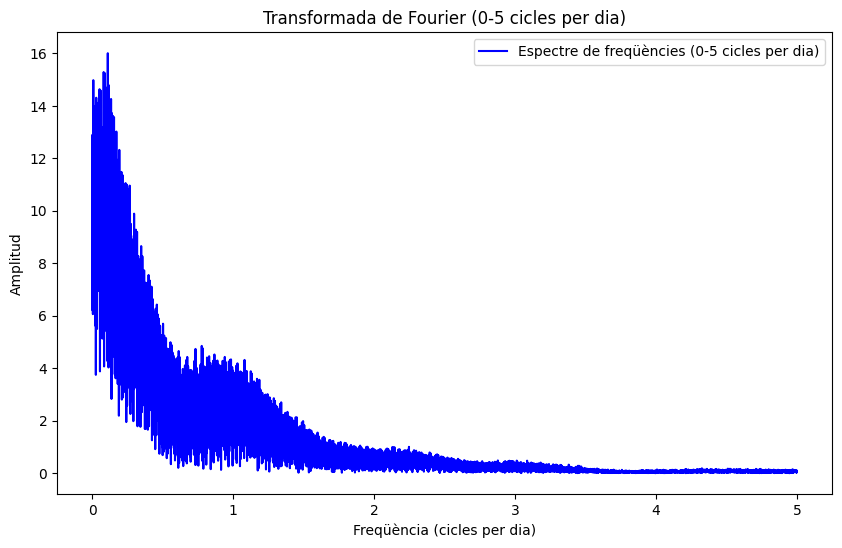

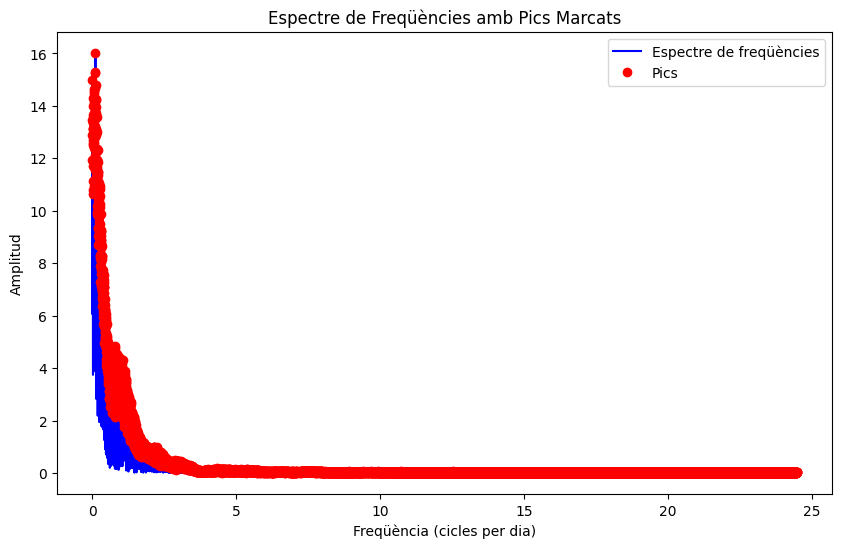

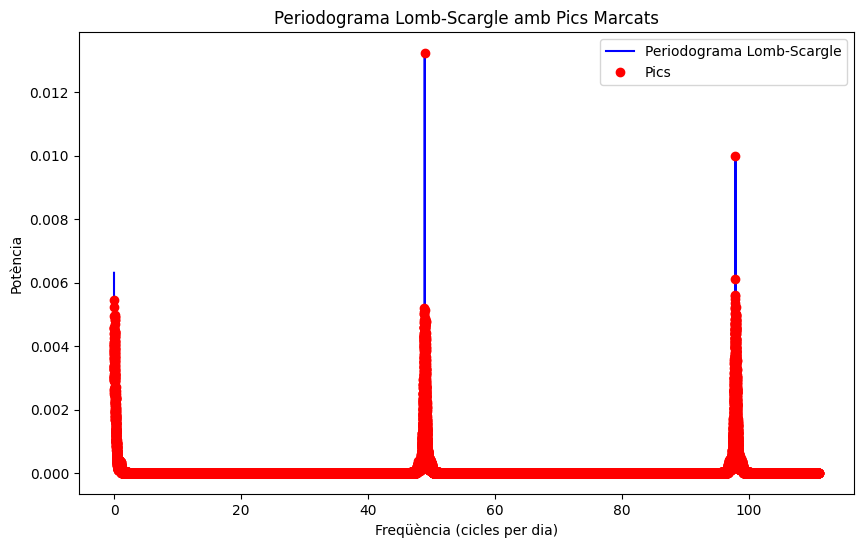

In [4]:

# Instal·lació de Lightkurve i altres biblioteques necessàries
!pip install lightkurve numpy matplotlib scipy

# Importar les biblioteques necessàries
import lightkurve as lk
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from astropy.timeseries import LombScargle

# Definir l'objectiu, l'estrella Tabby
target = "KIC 8462852"

# Cercar arxius de corba de llum per l'estrella i descarregar tots els arxius trobats
search_result = lk.search_lightcurvefile(target)
lc_collection = search_result.download_all()

# Combinar totes les corbes de llum en una única corba contínua
lc = lc_collection.stitch()

# Eliminar valors NaN i normalitzar la corba de llum
lc = lc.remove_nans().normalize()

# Eliminar tendències llargues amb un filtre Savitzky-Golay
lc_detrended = lc.flatten(window_length=401)

# Visualitzar la corba de llum processada
lc_detrended.plot()
plt.show()

# Aplicar la Transformada de Fourier
fft = np.fft.fft(lc_detrended.flux)
frequencies = np.fft.fftfreq(len(fft), lc_detrended.time[1].value - lc_detrended.time[0].value)

# Filtrar les freqüències positives
positive_frequencies = frequencies[frequencies > 0]
positive_fft = np.abs(fft[frequencies > 0])

# Visualitzar l'espectre de freqüències
plt.figure(figsize=(10, 6))
plt.plot(positive_frequencies, positive_fft, color='blue', label='Espectre de freqüències')
plt.xlabel("Freqüència (cicles per dia)")
plt.ylabel("Amplitud")
plt.title("Transformada de Fourier de l'Estrella Tabby")
plt.legend()
plt.show()

# Ampliar l'àrea entre 0 i 5 cicles per dia
plt.figure(figsize=(10, 6))
mask = (positive_frequencies > 0) & (positive_frequencies <= 5)
plt.plot(positive_frequencies[mask], positive_fft[mask], color='blue', label='Espectre de freqüències (0-5 cicles per dia)')
plt.xlabel("Freqüència (cicles per dia)")
plt.ylabel("Amplitud")
plt.title("Transformada de Fourier (0-5 cicles per dia)")
plt.legend()
plt.show()

# Detecció de pics en l'espectre de Fourier
peaks, _ = find_peaks(positive_fft)
peak_frequencies = positive_frequencies[peaks]
peak_amplitudes = positive_fft[peaks]

# Visualitzar l'espectre de freqüències amb els pics marcats
plt.figure(figsize=(10, 6))
plt.plot(positive_frequencies, positive_fft, color='blue', label='Espectre de freqüències')
plt.plot(peak_frequencies, peak_amplitudes, 'ro', label='Pics')
plt.xlabel("Freqüència (cicles per dia)")
plt.ylabel("Amplitud")
plt.title("Espectre de Freqüències amb Pics Marcats")
plt.legend()
plt.show()

# Aplicar el periodograma Lomb-Scargle
ls = LombScargle(lc_detrended.time, lc_detrended.flux)
frequency, power = ls.autopower()

# Detecció de pics en el periodograma Lomb-Scargle
peaks_ls, _ = find_peaks(power)
peak_frequencies_ls = frequency[peaks_ls]
peak_powers_ls = power[peaks_ls]

# Visualitzar el periodograma Lomb-Scargle amb els pics marcats
plt.figure(figsize=(10, 6))
plt.plot(frequency, power, color='blue', label='Periodograma Lomb-Scargle')
plt.plot(peak_frequencies_ls, peak_powers_ls, 'ro', label='Pics')
plt.xlabel("Freqüència (cicles per dia)")
plt.ylabel("Potència")
plt.title("Periodograma Lomb-Scargle amb Pics Marcats")
plt.legend()
plt.show()

<ipython-input-5-16d99d603b49>:15: LightkurveDeprecationWarning: The search_lightcurvefile function is deprecated and may be removed in a future version.
        Use search_lightcurve() instead.
  search_result = lk.search_lightcurvefile(target)


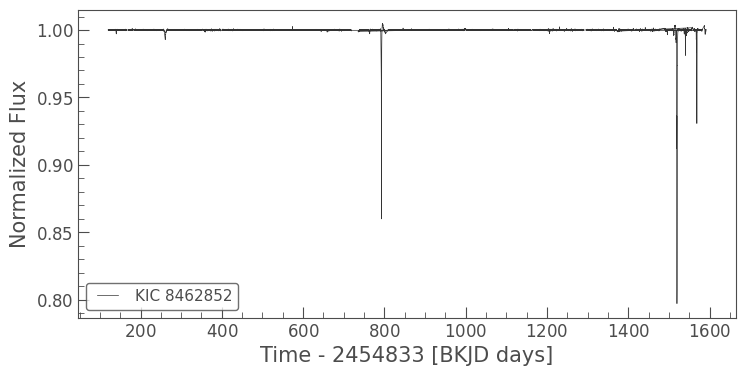

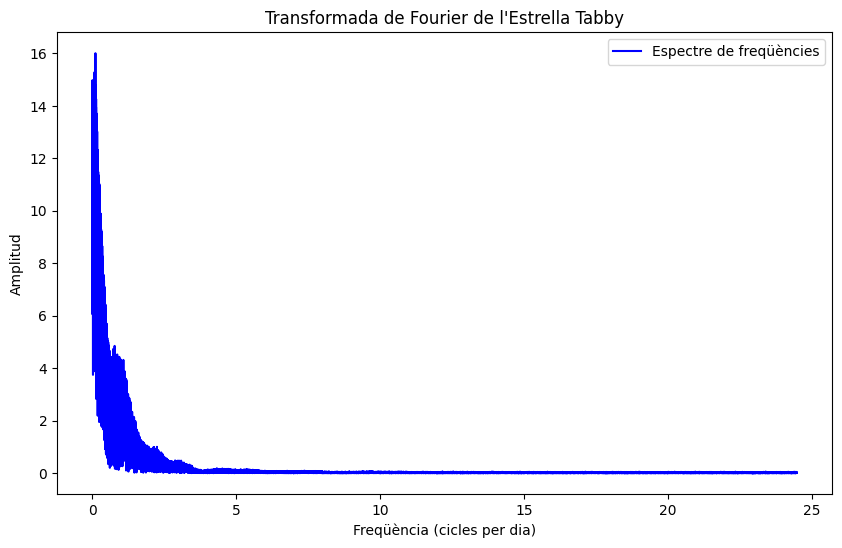

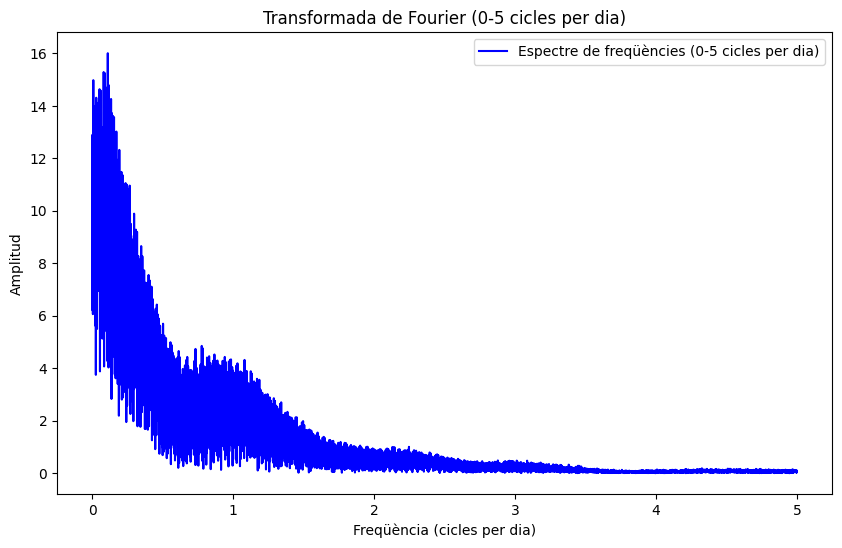

Se han truncado las últimas 5000 líneas del flujo de salida.
Freqüència: 13.2104 cicles per dia, Amplitud: 0.0190
Freqüència: 13.2119 cicles per dia, Amplitud: 0.0198
Freqüència: 13.2149 cicles per dia, Amplitud: 0.0225
Freqüència: 13.2172 cicles per dia, Amplitud: 0.0479
Freqüència: 13.2194 cicles per dia, Amplitud: 0.0276
Freqüència: 13.2217 cicles per dia, Amplitud: 0.0242
Freqüència: 13.2232 cicles per dia, Amplitud: 0.0332
Freqüència: 13.2262 cicles per dia, Amplitud: 0.0372
Freqüència: 13.2299 cicles per dia, Amplitud: 0.0199
Freqüència: 13.2329 cicles per dia, Amplitud: 0.0300
Freqüència: 13.2359 cicles per dia, Amplitud: 0.0227
Freqüència: 13.2397 cicles per dia, Amplitud: 0.0260
Freqüència: 13.2434 cicles per dia, Amplitud: 0.0359
Freqüència: 13.2479 cicles per dia, Amplitud: 0.0549
Freqüència: 13.2502 cicles per dia, Amplitud: 0.0375
Freqüència: 13.2532 cicles per dia, Amplitud: 0.0281
Freqüència: 13.2562 cicles per dia, Amplitud: 0.0229
Freqüència: 13.2584 cicles per dia, Am

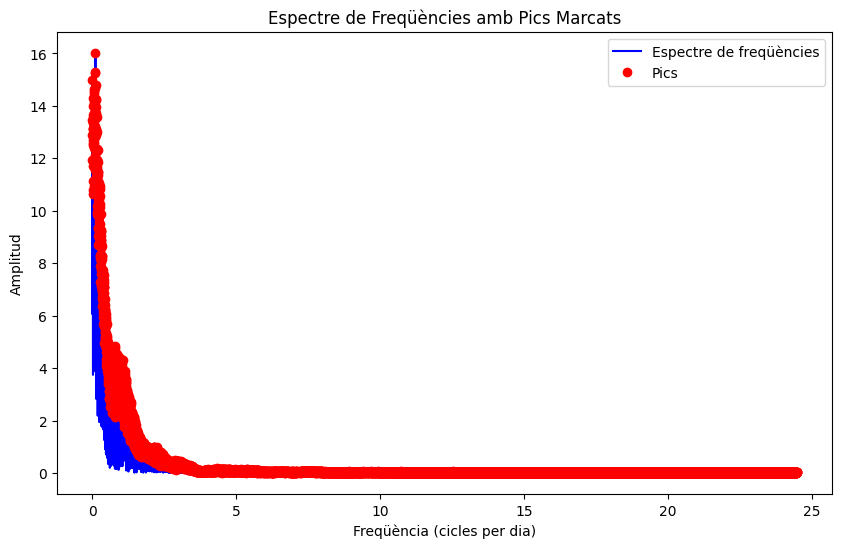

Se han truncado las últimas 5000 líneas del flujo de salida.
Freqüència: 104.0872 1 / d cicles per dia, Potència: 0.0000
Freqüència: 104.0886 1 / d cicles per dia, Potència: 0.0000
Freqüència: 104.0898 1 / d cicles per dia, Potència: 0.0000
Freqüència: 104.0913 1 / d cicles per dia, Potència: 0.0000
Freqüència: 104.0926 1 / d cicles per dia, Potència: 0.0000
Freqüència: 104.0940 1 / d cicles per dia, Potència: 0.0000
Freqüència: 104.0954 1 / d cicles per dia, Potència: 0.0000
Freqüència: 104.0967 1 / d cicles per dia, Potència: 0.0000
Freqüència: 104.0981 1 / d cicles per dia, Potència: 0.0000
Freqüència: 104.0996 1 / d cicles per dia, Potència: 0.0000
Freqüència: 104.1009 1 / d cicles per dia, Potència: 0.0000
Freqüència: 104.1023 1 / d cicles per dia, Potència: 0.0000
Freqüència: 104.1035 1 / d cicles per dia, Potència: 0.0000
Freqüència: 104.1050 1 / d cicles per dia, Potència: 0.0000
Freqüència: 104.1065 1 / d cicles per dia, Potència: 0.0000
Freqüència: 104.1077 1 / d cicles per d

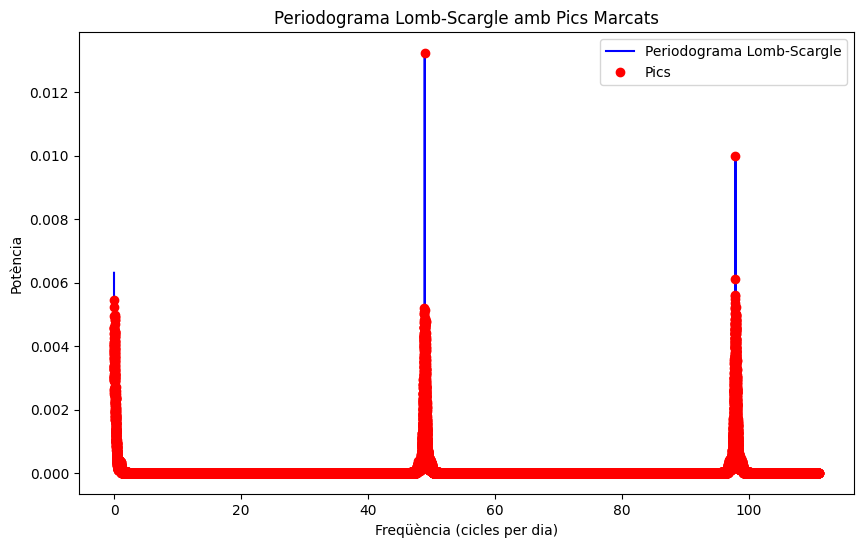

In [5]:

# Instal·lació de Lightkurve i altres biblioteques necessàries
!pip install lightkurve numpy matplotlib scipy

# Importar les biblioteques necessàries
import lightkurve as lk
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from astropy.timeseries import LombScargle

# Definir l'objectiu, l'estrella Tabby
target = "KIC 8462852"

# Cercar arxius de corba de llum per l'estrella i descarregar tots els arxius trobats
search_result = lk.search_lightcurvefile(target)
lc_collection = search_result.download_all()

# Combinar totes les corbes de llum en una única corba contínua
lc = lc_collection.stitch()

# Eliminar valors NaN i normalitzar la corba de llum
lc = lc.remove_nans().normalize()

# Eliminar tendències llargues amb un filtre Savitzky-Golay
lc_detrended = lc.flatten(window_length=401)

# Visualitzar la corba de llum processada
lc_detrended.plot()
plt.show()

# Aplicar la Transformada de Fourier
fft = np.fft.fft(lc_detrended.flux)
frequencies = np.fft.fftfreq(len(fft), lc_detrended.time[1].value - lc_detrended.time[0].value)

# Filtrar les freqüències positives
positive_frequencies = frequencies[frequencies > 0]
positive_fft = np.abs(fft[frequencies > 0])

# Visualitzar l'espectre de freqüències
plt.figure(figsize=(10, 6))
plt.plot(positive_frequencies, positive_fft, color='blue', label='Espectre de freqüències')
plt.xlabel("Freqüència (cicles per dia)")
plt.ylabel("Amplitud")
plt.title("Transformada de Fourier de l'Estrella Tabby")
plt.legend()
plt.show()

# Ampliar l'àrea entre 0 i 5 cicles per dia
plt.figure(figsize=(10, 6))
mask = (positive_frequencies > 0) & (positive_frequencies <= 5)
plt.plot(positive_frequencies[mask], positive_fft[mask], color='blue', label='Espectre de freqüències (0-5 cicles per dia)')
plt.xlabel("Freqüència (cicles per dia)")
plt.ylabel("Amplitud")
plt.title("Transformada de Fourier (0-5 cicles per dia)")
plt.legend()
plt.show()

# Detecció de pics en l'espectre de Fourier
peaks, _ = find_peaks(positive_fft)
peak_frequencies = positive_frequencies[peaks]
peak_amplitudes = positive_fft[peaks]

# Mostrar valors numèrics importants de la Transformada de Fourier
print("Pics detectats en la Transformada de Fourier:")
for i in range(len(peaks)):
    print(f"Freqüència: {peak_frequencies[i]:.4f} cicles per dia, Amplitud: {peak_amplitudes[i]:.4f}")

# Visualitzar l'espectre de freqüències amb els pics marcats
plt.figure(figsize=(10, 6))
plt.plot(positive_frequencies, positive_fft, color='blue', label='Espectre de freqüències')
plt.plot(peak_frequencies, peak_amplitudes, 'ro', label='Pics')
plt.xlabel("Freqüència (cicles per dia)")
plt.ylabel("Amplitud")
plt.title("Espectre de Freqüències amb Pics Marcats")
plt.legend()
plt.show()

# Aplicar el periodograma Lomb-Scargle
ls = LombScargle(lc_detrended.time, lc_detrended.flux)
frequency, power = ls.autopower()

# Detecció de pics en el periodograma Lomb-Scargle
peaks_ls, _ = find_peaks(power)
peak_frequencies_ls = frequency[peaks_ls]
peak_powers_ls = power[peaks_ls]

# Mostrar valors numèrics importants del periodograma Lomb-Scargle
print("Pics detectats en el periodograma Lomb-Scargle:")
for i in range(len(peaks_ls)):
    print(f"Freqüència: {peak_frequencies_ls[i]:.4f} cicles per dia, Potència: {peak_powers_ls[i]:.4f}")

# Visualitzar el periodograma Lomb-Scargle amb els pics marcats
plt.figure(figsize=(10, 6))
plt.plot(frequency, power, color='blue', label='Periodograma Lomb-Scargle')
plt.plot(peak_frequencies_ls, peak_powers_ls, 'ro', label='Pics')
plt.xlabel("Freqüència (cicles per dia)")
plt.ylabel("Potència")
plt.title("Periodograma Lomb-Scargle amb Pics Marcats")
plt.legend()
plt.show()

<ipython-input-6-16d99d603b49>:15: LightkurveDeprecationWarning: The search_lightcurvefile function is deprecated and may be removed in a future version.
        Use search_lightcurve() instead.
  search_result = lk.search_lightcurvefile(target)


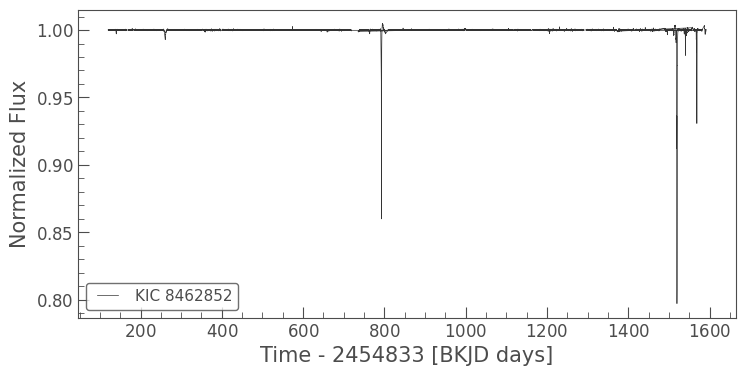

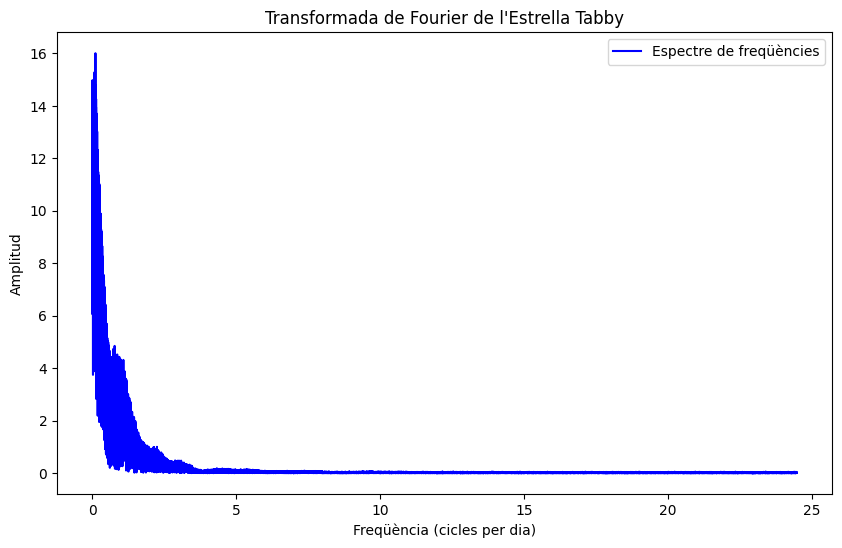

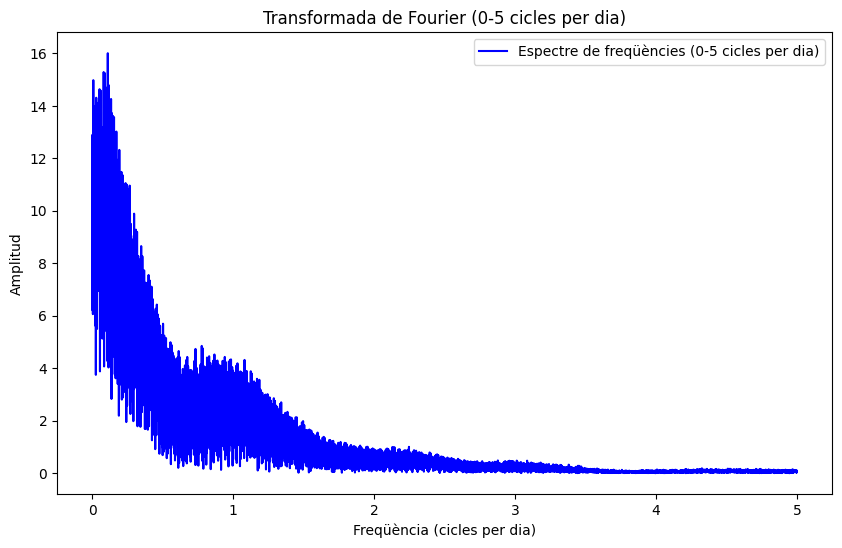

Se han truncado las últimas 5000 líneas del flujo de salida.
Freqüència: 13.2104 cicles per dia, Amplitud: 0.0190
Freqüència: 13.2119 cicles per dia, Amplitud: 0.0198
Freqüència: 13.2149 cicles per dia, Amplitud: 0.0225
Freqüència: 13.2172 cicles per dia, Amplitud: 0.0479
Freqüència: 13.2194 cicles per dia, Amplitud: 0.0276
Freqüència: 13.2217 cicles per dia, Amplitud: 0.0242
Freqüència: 13.2232 cicles per dia, Amplitud: 0.0332
Freqüència: 13.2262 cicles per dia, Amplitud: 0.0372
Freqüència: 13.2299 cicles per dia, Amplitud: 0.0199
Freqüència: 13.2329 cicles per dia, Amplitud: 0.0300
Freqüència: 13.2359 cicles per dia, Amplitud: 0.0227
Freqüència: 13.2397 cicles per dia, Amplitud: 0.0260
Freqüència: 13.2434 cicles per dia, Amplitud: 0.0359
Freqüència: 13.2479 cicles per dia, Amplitud: 0.0549
Freqüència: 13.2502 cicles per dia, Amplitud: 0.0375
Freqüència: 13.2532 cicles per dia, Amplitud: 0.0281
Freqüència: 13.2562 cicles per dia, Amplitud: 0.0229
Freqüència: 13.2584 cicles per dia, Am

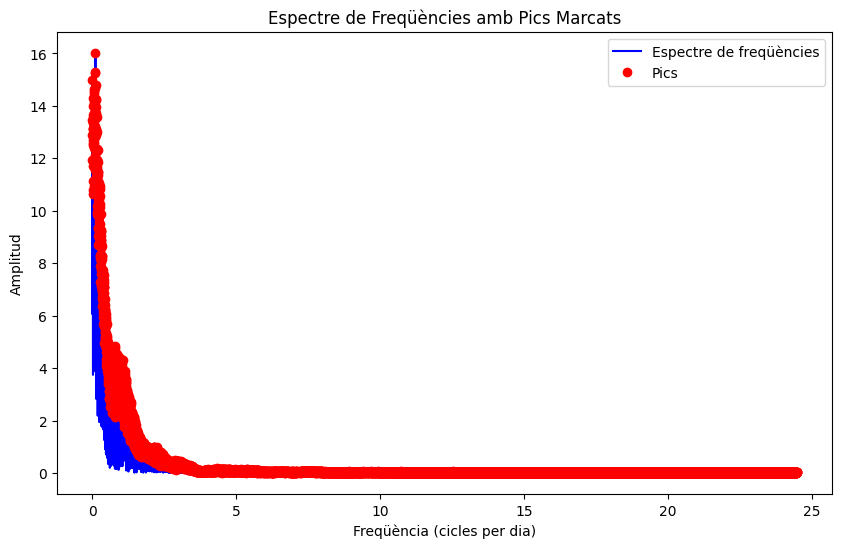

Se han truncado las últimas 5000 líneas del flujo de salida.
Freqüència: 104.0872 1 / d cicles per dia, Potència: 0.0000
Freqüència: 104.0886 1 / d cicles per dia, Potència: 0.0000
Freqüència: 104.0898 1 / d cicles per dia, Potència: 0.0000
Freqüència: 104.0913 1 / d cicles per dia, Potència: 0.0000
Freqüència: 104.0926 1 / d cicles per dia, Potència: 0.0000
Freqüència: 104.0940 1 / d cicles per dia, Potència: 0.0000
Freqüència: 104.0954 1 / d cicles per dia, Potència: 0.0000
Freqüència: 104.0967 1 / d cicles per dia, Potència: 0.0000
Freqüència: 104.0981 1 / d cicles per dia, Potència: 0.0000
Freqüència: 104.0996 1 / d cicles per dia, Potència: 0.0000
Freqüència: 104.1009 1 / d cicles per dia, Potència: 0.0000
Freqüència: 104.1023 1 / d cicles per dia, Potència: 0.0000
Freqüència: 104.1035 1 / d cicles per dia, Potència: 0.0000
Freqüència: 104.1050 1 / d cicles per dia, Potència: 0.0000
Freqüència: 104.1065 1 / d cicles per dia, Potència: 0.0000
Freqüència: 104.1077 1 / d cicles per d

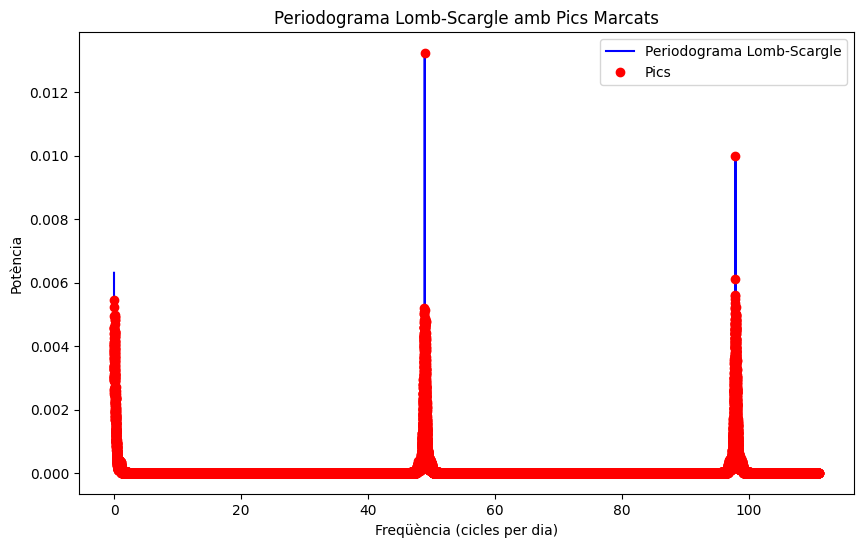

In [6]:

# Instal·lació de Lightkurve i altres biblioteques necessàries
!pip install lightkurve numpy matplotlib scipy

# Importar les biblioteques necessàries
import lightkurve as lk
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from astropy.timeseries import LombScargle

# Definir l'objectiu, l'estrella Tabby
target = "KIC 8462852"

# Cercar arxius de corba de llum per l'estrella i descarregar tots els arxius trobats
search_result = lk.search_lightcurvefile(target)
lc_collection = search_result.download_all()

# Combinar totes les corbes de llum en una única corba contínua
lc = lc_collection.stitch()

# Eliminar valors NaN i normalitzar la corba de llum
lc = lc.remove_nans().normalize()

# Eliminar tendències llargues amb un filtre Savitzky-Golay
lc_detrended = lc.flatten(window_length=401)

# Visualitzar la corba de llum processada
lc_detrended.plot()
plt.show()

# Aplicar la Transformada de Fourier
fft = np.fft.fft(lc_detrended.flux)
frequencies = np.fft.fftfreq(len(fft), lc_detrended.time[1].value - lc_detrended.time[0].value)

# Filtrar les freqüències positives
positive_frequencies = frequencies[frequencies > 0]
positive_fft = np.abs(fft[frequencies > 0])

# Visualitzar l'espectre de freqüències
plt.figure(figsize=(10, 6))
plt.plot(positive_frequencies, positive_fft, color='blue', label='Espectre de freqüències')
plt.xlabel("Freqüència (cicles per dia)")
plt.ylabel("Amplitud")
plt.title("Transformada de Fourier de l'Estrella Tabby")
plt.legend()
plt.show()

# Ampliar l'àrea entre 0 i 5 cicles per dia
plt.figure(figsize=(10, 6))
mask = (positive_frequencies > 0) & (positive_frequencies <= 5)
plt.plot(positive_frequencies[mask], positive_fft[mask], color='blue', label='Espectre de freqüències (0-5 cicles per dia)')
plt.xlabel("Freqüència (cicles per dia)")
plt.ylabel("Amplitud")
plt.title("Transformada de Fourier (0-5 cicles per dia)")
plt.legend()
plt.show()

# Detecció de pics en l'espectre de Fourier
peaks, _ = find_peaks(positive_fft)
peak_frequencies = positive_frequencies[peaks]
peak_amplitudes = positive_fft[peaks]

# Mostrar valors numèrics importants de la Transformada de Fourier
print("Pics detectats en la Transformada de Fourier:")
for i in range(len(peaks)):
    print(f"Freqüència: {peak_frequencies[i]:.4f} cicles per dia, Amplitud: {peak_amplitudes[i]:.4f}")

# Visualitzar l'espectre de freqüències amb els pics marcats
plt.figure(figsize=(10, 6))
plt.plot(positive_frequencies, positive_fft, color='blue', label='Espectre de freqüències')
plt.plot(peak_frequencies, peak_amplitudes, 'ro', label='Pics')
plt.xlabel("Freqüència (cicles per dia)")
plt.ylabel("Amplitud")
plt.title("Espectre de Freqüències amb Pics Marcats")
plt.legend()
plt.show()

# Aplicar el periodograma Lomb-Scargle
ls = LombScargle(lc_detrended.time, lc_detrended.flux)
frequency, power = ls.autopower()

# Detecció de pics en el periodograma Lomb-Scargle
peaks_ls, _ = find_peaks(power)
peak_frequencies_ls = frequency[peaks_ls]
peak_powers_ls = power[peaks_ls]

# Mostrar valors numèrics importants del periodograma Lomb-Scargle
print("Pics detectats en el periodograma Lomb-Scargle:")
for i in range(len(peaks_ls)):
    print(f"Freqüència: {peak_frequencies_ls[i]:.4f} cicles per dia, Potència: {peak_powers_ls[i]:.4f}")

# Visualitzar el periodograma Lomb-Scargle amb els pics marcats
plt.figure(figsize=(10, 6))
plt.plot(frequency, power, color='blue', label='Periodograma Lomb-Scargle')
plt.plot(peak_frequencies_ls, peak_powers_ls, 'ro', label='Pics')
plt.xlabel("Freqüència (cicles per dia)")
plt.ylabel("Potència")
plt.title("Periodograma Lomb-Scargle amb Pics Marcats")
plt.legend()
plt.show()

<ipython-input-7-7a71fc24fa45>:15: LightkurveDeprecationWarning: The search_lightcurvefile function is deprecated and may be removed in a future version.
        Use search_lightcurve() instead.
  search_result = lk.search_lightcurvefile(target)


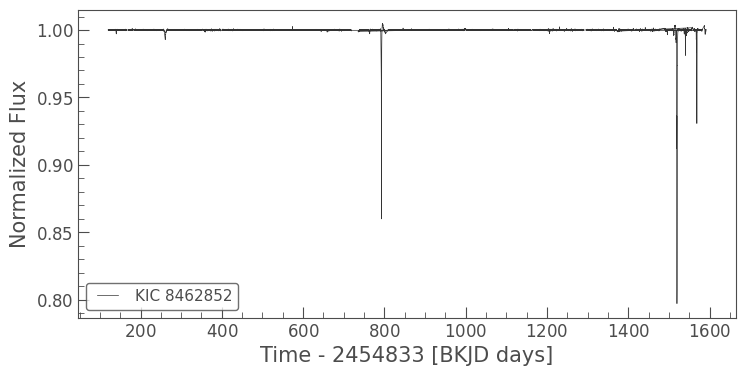

Els 10 pics més importants en la Transformada de Fourier:
Freqüència: 0.1110 cicles per dia, Amplitud: 16.0079
Freqüència: 0.0817 cicles per dia, Amplitud: 15.2906
Freqüència: 0.0900 cicles per dia, Amplitud: 15.2499
Freqüència: 0.0082 cicles per dia, Amplitud: 14.9809
Freqüència: 0.1192 cicles per dia, Amplitud: 14.7828
Freqüència: 0.1027 cicles per dia, Amplitud: 14.6920
Freqüència: 0.0525 cicles per dia, Amplitud: 14.6358
Freqüència: 0.0607 cicles per dia, Amplitud: 14.5822
Freqüència: 0.0502 cicles per dia, Amplitud: 14.4746
Freqüència: 0.0292 cicles per dia, Amplitud: 14.3113


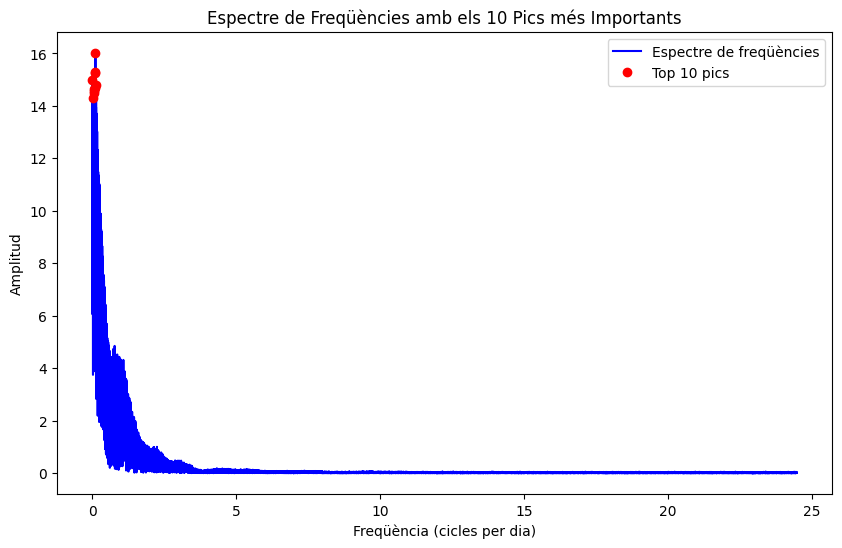

Els 10 pics més importants en el periodograma Lomb-Scargle:
Freqüència: 48.9390 1 / d cicles per dia, Potència: 0.0132
Freqüència: 97.8779 1 / d cicles per dia, Potència: 0.0100
Freqüència: 97.8766 1 / d cicles per dia, Potència: 0.0061
Freqüència: 97.8794 1 / d cicles per dia, Potència: 0.0056
Freqüència: 97.8727 1 / d cicles per dia, Potència: 0.0056
Freqüència: 97.8740 1 / d cicles per dia, Potència: 0.0055
Freqüència: 0.0013 1 / d cicles per dia, Potència: 0.0055
Freqüència: 97.8354 1 / d cicles per dia, Potència: 0.0054
Freqüència: 0.0413 1 / d cicles per dia, Potència: 0.0053
Freqüència: 97.8341 1 / d cicles per dia, Potència: 0.0052


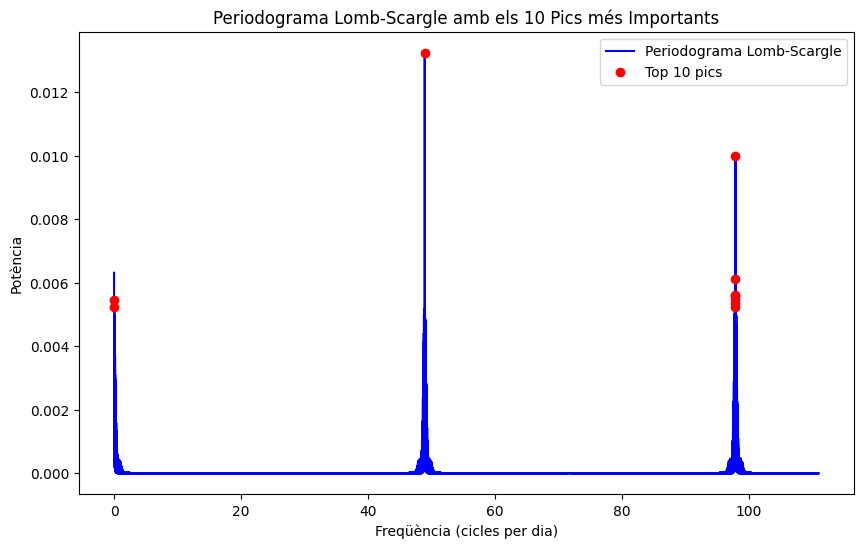

In [7]:

# Instal·lació de Lightkurve i altres biblioteques necessàries
!pip install lightkurve numpy matplotlib scipy

# Importar les biblioteques necessàries
import lightkurve as lk
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from astropy.timeseries import LombScargle

# Definir l'objectiu, l'estrella Tabby
target = "KIC 8462852"

# Cercar arxius de corba de llum per l'estrella i descarregar tots els arxius trobats
search_result = lk.search_lightcurvefile(target)
lc_collection = search_result.download_all()

# Combinar totes les corbes de llum en una única corba contínua
lc = lc_collection.stitch()

# Eliminar valors NaN i normalitzar la corba de llum
lc = lc.remove_nans().normalize()

# Eliminar tendències llargues amb un filtre Savitzky-Golay
lc_detrended = lc.flatten(window_length=401)

# Visualitzar la corba de llum processada
lc_detrended.plot()
plt.show()

# Aplicar la Transformada de Fourier
fft = np.fft.fft(lc_detrended.flux)
frequencies = np.fft.fftfreq(len(fft), lc_detrended.time[1].value - lc_detrended.time[0].value)

# Filtrar les freqüències positives
positive_frequencies = frequencies[frequencies > 0]
positive_fft = np.abs(fft[frequencies > 0])

# Detecció de pics en l'espectre de Fourier
peaks, _ = find_peaks(positive_fft)
peak_frequencies = positive_frequencies[peaks]
peak_amplitudes = positive_fft[peaks]

# Seleccionar els 10 pics més importants (per amplitud) de la Transformada de Fourier
top_10_peaks = np.argsort(peak_amplitudes)[-10:][::-1]
top_10_frequencies = peak_frequencies[top_10_peaks]
top_10_amplitudes = peak_amplitudes[top_10_peaks]

# Mostrar valors numèrics importants de la Transformada de Fourier
print("Els 10 pics més importants en la Transformada de Fourier:")
for i in range(len(top_10_peaks)):
    print(f"Freqüència: {top_10_frequencies[i]:.4f} cicles per dia, Amplitud: {top_10_amplitudes[i]:.4f}")

# Visualitzar l'espectre de freqüències amb els 10 pics més importants marcats
plt.figure(figsize=(10, 6))
plt.plot(positive_frequencies, positive_fft, color='blue', label='Espectre de freqüències')
plt.plot(top_10_frequencies, top_10_amplitudes, 'ro', label='Top 10 pics')
plt.xlabel("Freqüència (cicles per dia)")
plt.ylabel("Amplitud")
plt.title("Espectre de Freqüències amb els 10 Pics més Importants")
plt.legend()
plt.show()

# Aplicar el periodograma Lomb-Scargle
ls = LombScargle(lc_detrended.time, lc_detrended.flux)
frequency, power = ls.autopower()

# Detecció de pics en el periodograma Lomb-Scargle
peaks_ls, _ = find_peaks(power)
peak_frequencies_ls = frequency[peaks_ls]
peak_powers_ls = power[peaks_ls]

# Seleccionar els 10 pics més importants (per potència) del periodograma Lomb-Scargle
top_10_peaks_ls = np.argsort(peak_powers_ls)[-10:][::-1]
top_10_frequencies_ls = peak_frequencies_ls[top_10_peaks_ls]
top_10_powers_ls = peak_powers_ls[top_10_peaks_ls]

# Mostrar valors numèrics importants del periodograma Lomb-Scargle
print("Els 10 pics més importants en el periodograma Lomb-Scargle:")
for i in range(len(top_10_peaks_ls)):
    print(f"Freqüència: {top_10_frequencies_ls[i]:.4f} cicles per dia, Potència: {top_10_powers_ls[i]:.4f}")

# Visualitzar el periodograma Lomb-Scargle amb els 10 pics més importants marcats
plt.figure(figsize=(10, 6))
plt.plot(frequency, power, color='blue', label='Periodograma Lomb-Scargle')
plt.plot(top_10_frequencies_ls, top_10_powers_ls, 'ro', label='Top 10 pics')
plt.xlabel("Freqüència (cicles per dia)")
plt.ylabel("Potència")
plt.title("Periodograma Lomb-Scargle amb els 10 Pics més Importants")
plt.legend()
plt.show()

Anàlisi de l'estrella KIC 8462852


<ipython-input-4-777a82d7c5a3>:18: LightkurveDeprecationWarning: The search_lightcurvefile function is deprecated and may be removed in a future version.
        Use search_lightcurve() instead.
  search_result = lk.search_lightcurvefile(target)


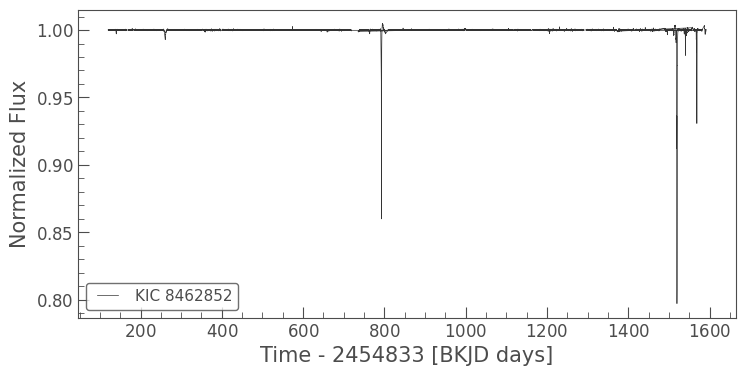

Els 10 pics més importants en la Transformada de Fourier:
Freqüència: 0.1110 cicles per dia, Amplitud: 16.0079
Freqüència: 0.0817 cicles per dia, Amplitud: 15.2906
Freqüència: 0.0900 cicles per dia, Amplitud: 15.2499
Freqüència: 0.0082 cicles per dia, Amplitud: 14.9809
Freqüència: 0.1192 cicles per dia, Amplitud: 14.7828
Freqüència: 0.1027 cicles per dia, Amplitud: 14.6920
Freqüència: 0.0525 cicles per dia, Amplitud: 14.6358
Freqüència: 0.0607 cicles per dia, Amplitud: 14.5822
Freqüència: 0.0502 cicles per dia, Amplitud: 14.4746
Freqüència: 0.0292 cicles per dia, Amplitud: 14.3113


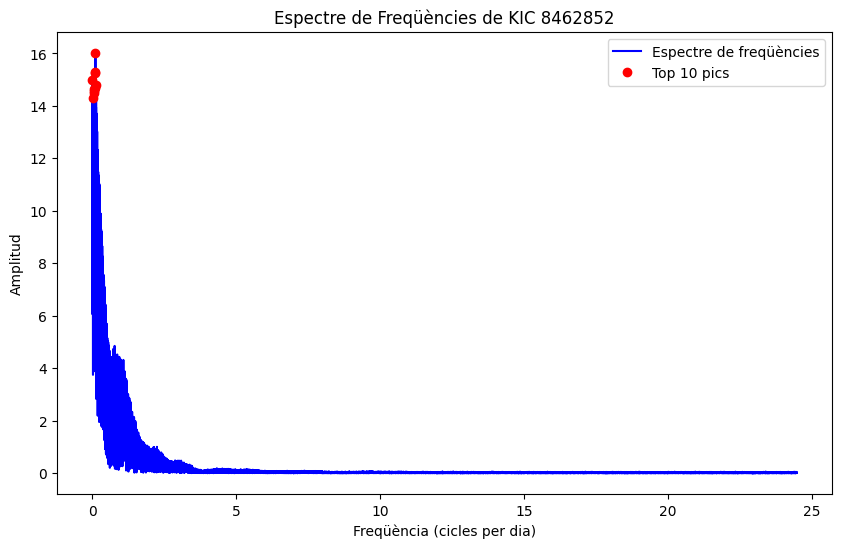

Els 10 pics més importants en el periodograma Lomb-Scargle:
Freqüència: 48.9390 1 / d cicles per dia, Potència: 0.0132
Freqüència: 97.8779 1 / d cicles per dia, Potència: 0.0100
Freqüència: 97.8766 1 / d cicles per dia, Potència: 0.0061
Freqüència: 97.8794 1 / d cicles per dia, Potència: 0.0056
Freqüència: 97.8727 1 / d cicles per dia, Potència: 0.0056
Freqüència: 97.8740 1 / d cicles per dia, Potència: 0.0055
Freqüència: 0.0013 1 / d cicles per dia, Potència: 0.0055
Freqüència: 97.8354 1 / d cicles per dia, Potència: 0.0054
Freqüència: 0.0413 1 / d cicles per dia, Potència: 0.0053
Freqüència: 97.8341 1 / d cicles per dia, Potència: 0.0052


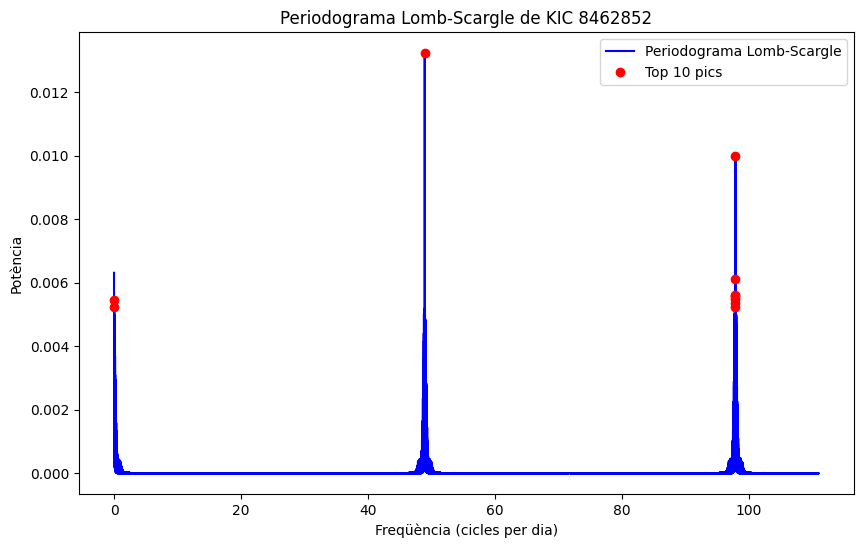

Període de transit més probable: 29.0707 dies


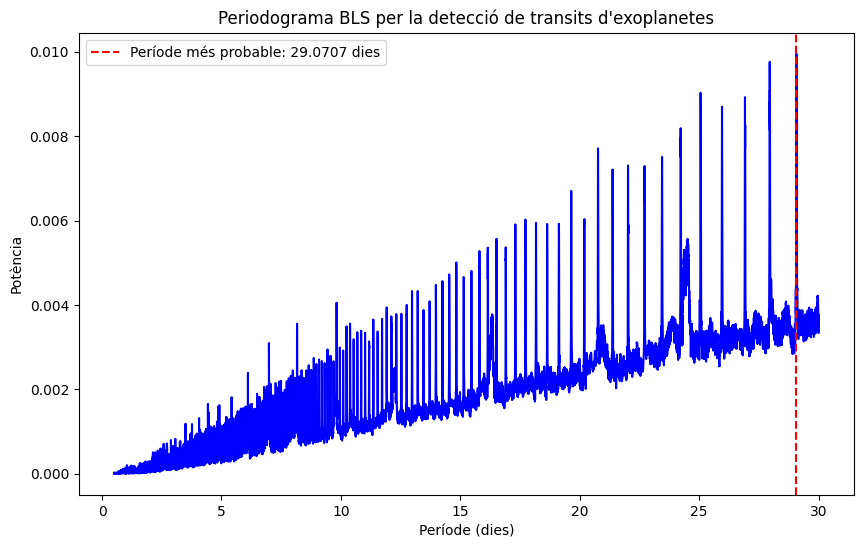

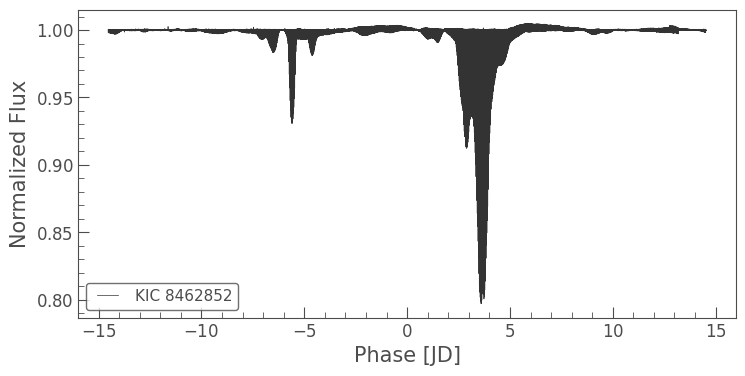


--------------------------------------------------

Anàlisi de l'estrella KIC 12557548


<ipython-input-4-777a82d7c5a3>:18: LightkurveDeprecationWarning: The search_lightcurvefile function is deprecated and may be removed in a future version.
        Use search_lightcurve() instead.
  search_result = lk.search_lightcurvefile(target)


KeyboardInterrupt: 

In [4]:

# Instal·lació de Lightkurve i altres biblioteques necessàries
!pip install lightkurve numpy matplotlib scipy astropy

# Importar les biblioteques necessàries
import lightkurve as lk
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from astropy.timeseries import BoxLeastSquares, LombScargle

# Definir una llista d'estrelles per a la comparació
targets = ["KIC 8462852", "KIC 12557548", "HD 209458", "HD 189733"]

for target in targets:
    print(f"Anàlisi de l'estrella {target}")

    # Cercar arxius de corba de llum per l'estrella i descarregar tots els arxius trobats
    search_result = lk.search_lightcurvefile(target)
    lc_collection = search_result.download_all()

    # Combinar totes les corbes de llum en una única corba contínua
    lc = lc_collection.stitch()

    # Eliminar valors NaN i normalitzar la corba de llum
    lc = lc.remove_nans().normalize()

    # Eliminar tendències llargues amb un filtre Savitzky-Golay
    lc_detrended = lc.flatten(window_length=401)

    # Visualitzar la corba de llum processada
    lc_detrended.plot(title=f"Corba de llum detrended de {target}")
    plt.show()

    # Aplicar la Transformada de Fourier
    fft = np.fft.fft(lc_detrended.flux)
    frequencies = np.fft.fftfreq(len(fft), lc_detrended.time[1].value - lc_detrended.time[0].value)

    # Filtrar les freqüències positives
    positive_frequencies = frequencies[frequencies > 0]
    positive_fft = np.abs(fft[frequencies > 0])

    # Detecció de pics en l'espectre de Fourier
    peaks, _ = find_peaks(positive_fft)
    peak_frequencies = positive_frequencies[peaks]
    peak_amplitudes = positive_fft[peaks]

    # Seleccionar els 10 pics més importants (per amplitud) de la Transformada de Fourier
    top_10_peaks = np.argsort(peak_amplitudes)[-10:][::-1]
    top_10_frequencies = peak_frequencies[top_10_peaks]
    top_10_amplitudes = peak_amplitudes[top_10_peaks]

    # Mostrar valors numèrics importants de la Transformada de Fourier
    print("Els 10 pics més importants en la Transformada de Fourier:")
    for i in range(len(top_10_peaks)):
        print(f"Freqüència: {top_10_frequencies[i]:.4f} cicles per dia, Amplitud: {top_10_amplitudes[i]:.4f}")

    # Visualitzar l'espectre de freqüències amb els 10 pics més importants marcats
    plt.figure(figsize=(10, 6))
    plt.plot(positive_frequencies, positive_fft, color='blue', label='Espectre de freqüències')
    plt.plot(top_10_frequencies, top_10_amplitudes, 'ro', label='Top 10 pics')
    plt.xlabel("Freqüència (cicles per dia)")
    plt.ylabel("Amplitud")
    plt.title(f"Espectre de Freqüències de {target}")
    plt.legend()
    plt.show()

    # Aplicar el periodograma Lomb-Scargle
    ls = LombScargle(lc_detrended.time, lc_detrended.flux)
    frequency, power = ls.autopower()

    # Detecció de pics en el periodograma Lomb-Scargle
    peaks_ls, _ = find_peaks(power)
    peak_frequencies_ls = frequency[peaks_ls]
    peak_powers_ls = power[peaks_ls]

    # Seleccionar els 10 pics més importants (per potència) del periodograma Lomb-Scargle
    top_10_peaks_ls = np.argsort(peak_powers_ls)[-10:][::-1]
    top_10_frequencies_ls = peak_frequencies_ls[top_10_peaks_ls]
    top_10_powers_ls = peak_powers_ls[top_10_peaks_ls]

    # Mostrar valors numèrics importants del periodograma Lomb-Scargle
    print("Els 10 pics més importants en el periodograma Lomb-Scargle:")
    for i in range(len(top_10_peaks_ls)):
        print(f"Freqüència: {top_10_frequencies_ls[i]:.4f} cicles per dia, Potència: {top_10_powers_ls[i]:.4f}")

    # Visualitzar el periodograma Lomb-Scargle amb els 10 pics més importants marcats
    plt.figure(figsize=(10, 6))
    plt.plot(frequency, power, color='blue', label='Periodograma Lomb-Scargle')
    plt.plot(top_10_frequencies_ls, top_10_powers_ls, 'ro', label='Top 10 pics')
    plt.xlabel("Freqüència (cicles per dia)")
    plt.ylabel("Potència")
    plt.title(f"Periodograma Lomb-Scargle de {target}")
    plt.legend()
    plt.show()

    # Detecció de transits d'exoplanetes amb el Box Least Squares (BLS)
    bls = BoxLeastSquares(lc_detrended.time, lc_detrended.flux)
    periods = np.linspace(0.5, 30, 10000)
    bls_power = bls.power(periods, 0.2)
    best_period = bls_power.period[np.argmax(bls_power.power)]

    # Convertir el període a dies si cal
    best_period_days = best_period.to_value('day')

    # Mostrar el període del transit més probable
    print(f"Període de transit més probable: {best_period_days:.4f} dies")

    # Visualitzar el periodograma BLS
    plt.figure(figsize=(10, 6))
    plt.plot(bls_power.period.to_value('day'), bls_power.power, color='blue')
    plt.xlabel("Període (dies)")
    plt.ylabel("Potència")
    plt.title("Periodograma BLS per la detecció de transits d'exoplanetes")
    plt.axvline(best_period_days, color='red', linestyle='--', label=f"Període més probable: {best_period_days:.4f} dies")
    plt.legend()
    plt.show()

    # Fasejar la corba de llum segons el període de transit més probable
    lc_folded = lc_detrended.fold(period=best_period_days)
    lc_folded.plot()
    plt.show()

    print("\n" + "-"*50 + "\n")

Anàlisi de l'estrella KIC 8462852


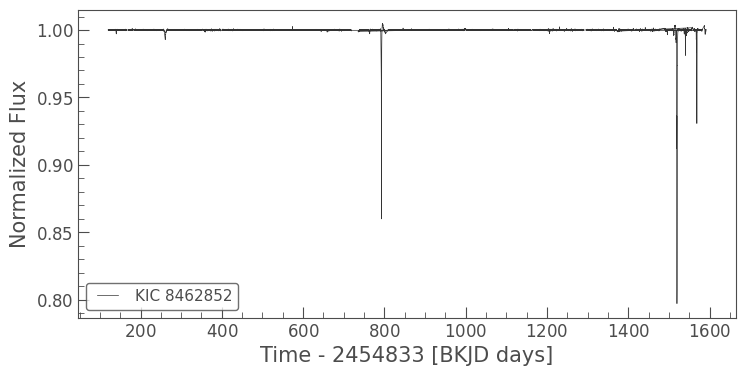

Els 10 pics més importants en la Transformada de Fourier:
Freqüència: 0.1110 cicles per dia, Amplitud: 16.0079
Freqüència: 0.0817 cicles per dia, Amplitud: 15.2906
Freqüència: 0.0900 cicles per dia, Amplitud: 15.2499
Freqüència: 0.0082 cicles per dia, Amplitud: 14.9809
Freqüència: 0.1192 cicles per dia, Amplitud: 14.7828
Freqüència: 0.1027 cicles per dia, Amplitud: 14.6920
Freqüència: 0.0525 cicles per dia, Amplitud: 14.6358
Freqüència: 0.0607 cicles per dia, Amplitud: 14.5822
Freqüència: 0.0502 cicles per dia, Amplitud: 14.4746
Freqüència: 0.0292 cicles per dia, Amplitud: 14.3113


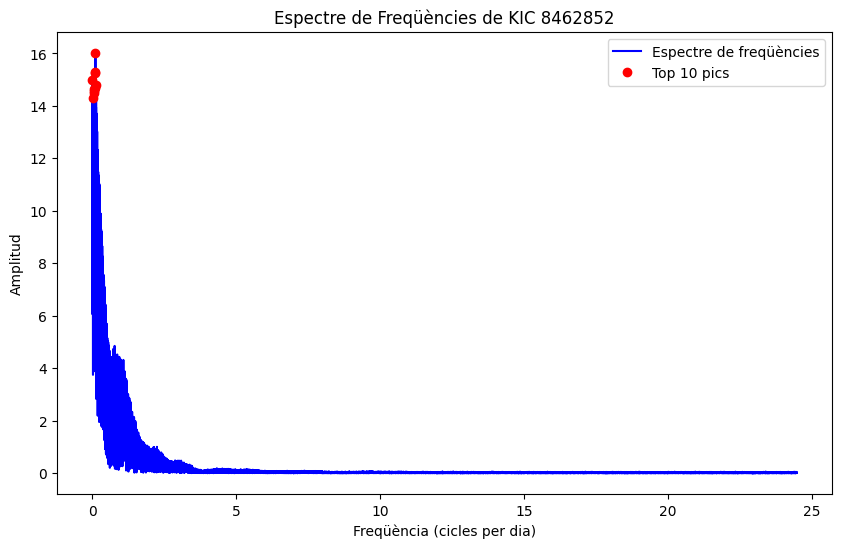

Els 10 pics més importants en el periodograma Lomb-Scargle:
Freqüència: 48.9390 1 / d cicles per dia, Potència: 0.0132
Freqüència: 97.8779 1 / d cicles per dia, Potència: 0.0100
Freqüència: 97.8766 1 / d cicles per dia, Potència: 0.0061
Freqüència: 97.8794 1 / d cicles per dia, Potència: 0.0056
Freqüència: 97.8727 1 / d cicles per dia, Potència: 0.0056
Freqüència: 97.8740 1 / d cicles per dia, Potència: 0.0055
Freqüència: 0.0013 1 / d cicles per dia, Potència: 0.0055
Freqüència: 97.8354 1 / d cicles per dia, Potència: 0.0054
Freqüència: 0.0413 1 / d cicles per dia, Potència: 0.0053
Freqüència: 97.8341 1 / d cicles per dia, Potència: 0.0052


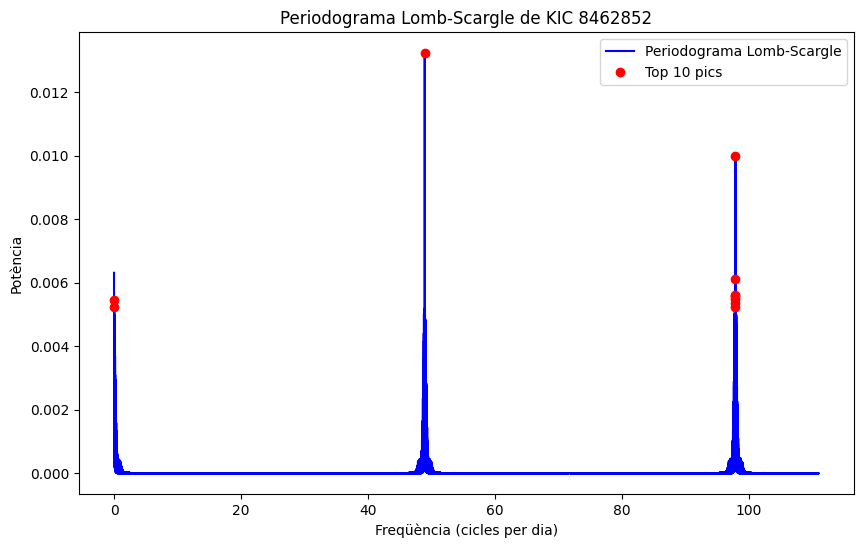

Període de transit més probable: 29.0707 dies


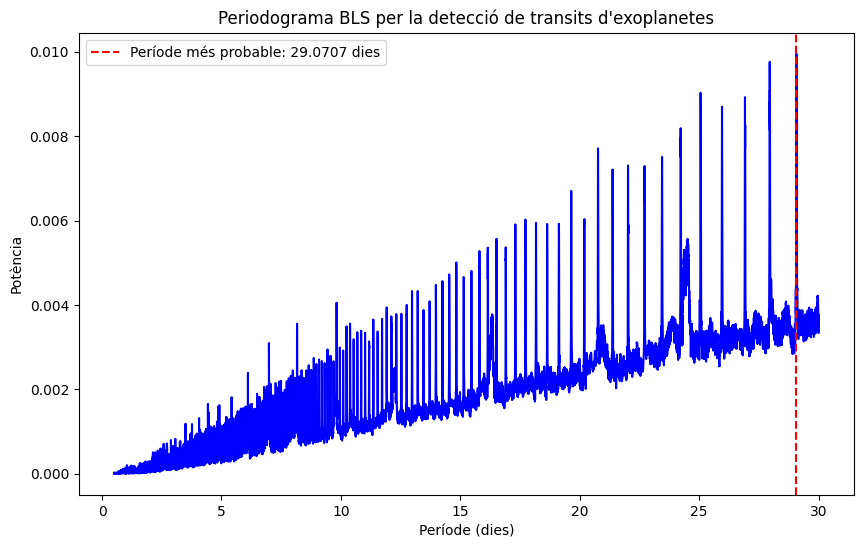

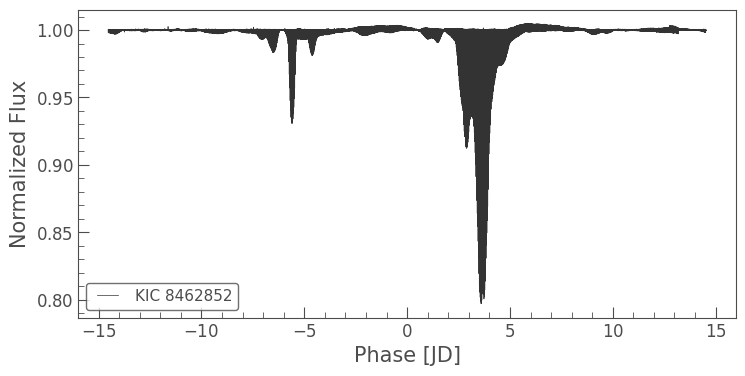


--------------------------------------------------

Anàlisi de l'estrella KIC 12557548


KeyboardInterrupt: 

In [5]:

# Instal·lació de Lightkurve i altres biblioteques necessàries
!pip install lightkurve numpy matplotlib scipy astropy

# Importar les biblioteques necessàries
import lightkurve as lk
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from astropy.timeseries import BoxLeastSquares, LombScargle

# Definir una llista d'estrelles per a la comparació
targets = ["KIC 8462852", "KIC 12557548", "HD 209458", "HD 189733"]

for target in targets:
    print(f"Anàlisi de l'estrella {target}")

    # Cercar arxius de corba de llum per l'estrella i descarregar tots els arxius trobats
    search_result = lk.search_lightcurve(target)
    lc_collection = search_result.download_all()

    # Combinar totes les corbes de llum en una única corba contínua
    lc = lc_collection.stitch()

    # Eliminar valors NaN i normalitzar la corba de llum
    lc = lc.remove_nans().normalize()

    # Eliminar tendències llargues amb un filtre Savitzky-Golay
    lc_detrended = lc.flatten(window_length=401)

    # Visualitzar la corba de llum processada
    lc_detrended.plot(title=f"Corba de llum detrended de {target}")
    plt.show()

    # Aplicar la Transformada de Fourier
    fft = np.fft.fft(lc_detrended.flux)
    frequencies = np.fft.fftfreq(len(fft), lc_detrended.time[1].value - lc_detrended.time[0].value)

    # Filtrar les freqüències positives
    positive_frequencies = frequencies[frequencies > 0]
    positive_fft = np.abs(fft[frequencies > 0])

    # Detecció de pics en l'espectre de Fourier
    peaks, _ = find_peaks(positive_fft)
    peak_frequencies = positive_frequencies[peaks]
    peak_amplitudes = positive_fft[peaks]

    # Seleccionar els 10 pics més importants (per amplitud) de la Transformada de Fourier
    top_10_peaks = np.argsort(peak_amplitudes)[-10:][::-1]
    top_10_frequencies = peak_frequencies[top_10_peaks]
    top_10_amplitudes = peak_amplitudes[top_10_peaks]

    # Mostrar valors numèrics importants de la Transformada de Fourier
    print("Els 10 pics més importants en la Transformada de Fourier:")
    for i in range(len(top_10_peaks)):
        print(f"Freqüència: {top_10_frequencies[i]:.4f} cicles per dia, Amplitud: {top_10_amplitudes[i]:.4f}")

    # Visualitzar l'espectre de freqüències amb els 10 pics més importants marcats
    plt.figure(figsize=(10, 6))
    plt.plot(positive_frequencies, positive_fft, color='blue', label='Espectre de freqüències')
    plt.plot(top_10_frequencies, top_10_amplitudes, 'ro', label='Top 10 pics')
    plt.xlabel("Freqüència (cicles per dia)")
    plt.ylabel("Amplitud")
    plt.title(f"Espectre de Freqüències de {target}")
    plt.legend()
    plt.show()

    # Aplicar el periodograma Lomb-Scargle
    ls = LombScargle(lc_detrended.time, lc_detrended.flux)
    frequency, power = ls.autopower()

    # Detecció de pics en el periodograma Lomb-Scargle
    peaks_ls, _ = find_peaks(power)
    peak_frequencies_ls = frequency[peaks_ls]
    peak_powers_ls = power[peaks_ls]

    # Seleccionar els 10 pics més importants (per potència) del periodograma Lomb-Scargle
    top_10_peaks_ls = np.argsort(peak_powers_ls)[-10:][::-1]
    top_10_frequencies_ls = peak_frequencies_ls[top_10_peaks_ls]
    top_10_powers_ls = peak_powers_ls[top_10_peaks_ls]

    # Mostrar valors numèrics importants del periodograma Lomb-Scargle
    print("Els 10 pics més importants en el periodograma Lomb-Scargle:")
    for i in range(len(top_10_peaks_ls)):
        print(f"Freqüència: {top_10_frequencies_ls[i]:.4f} cicles per dia, Potència: {top_10_powers_ls[i]:.4f}")

    # Visualitzar el periodograma Lomb-Scargle amb els 10 pics més importants marcats
    plt.figure(figsize=(10, 6))
    plt.plot(frequency, power, color='blue', label='Periodograma Lomb-Scargle')
    plt.plot(top_10_frequencies_ls, top_10_powers_ls, 'ro', label='Top 10 pics')
    plt.xlabel("Freqüència (cicles per dia)")
    plt.ylabel("Potència")
    plt.title(f"Periodograma Lomb-Scargle de {target}")
    plt.legend()
    plt.show()

    # Detecció de transits d'exoplanetes amb el Box Least Squares (BLS)
    bls = BoxLeastSquares(lc_detrended.time, lc_detrended.flux)
    periods = np.linspace(0.5, 30, 10000)
    bls_power = bls.power(periods, 0.2)
    best_period = bls_power.period[np.argmax(bls_power.power)]

    # Convertir el període a dies si cal
    best_period_days = best_period.to_value('day')

    # Mostrar el període del transit més probable
    print(f"Període de transit més probable: {best_period_days:.4f} dies")

    # Visualitzar el periodograma BLS
    plt.figure(figsize=(10, 6))
    plt.plot(bls_power.period.to_value('day'), bls_power.power, color='blue')
    plt.xlabel("Període (dies)")
    plt.ylabel("Potència")
    plt.title("Periodograma BLS per la detecció de transits d'exoplanetes")
    plt.axvline(best_period_days, color='red', linestyle='--', label=f"Període més probable: {best_period_days:.4f} dies")
    plt.legend()
    plt.show()

    # Fasejar la corba de llum segons el període de transit més probable
    lc_folded = lc_detrended.fold(period=best_period_days)
    lc_folded.plot()
    plt.show()

    print("\n" + "-"*50 + "\n")

Anàlisi de l'estrella KIC 8462852


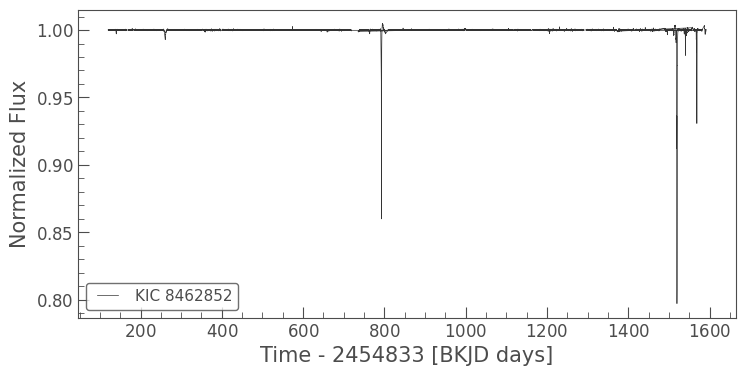

Els 10 pics més importants en la Transformada de Fourier:
Freqüència: 0.1110 cicles per dia, Amplitud: 16.0079
Freqüència: 0.0817 cicles per dia, Amplitud: 15.2906
Freqüència: 0.0900 cicles per dia, Amplitud: 15.2499
Freqüència: 0.0082 cicles per dia, Amplitud: 14.9809
Freqüència: 0.1192 cicles per dia, Amplitud: 14.7828
Freqüència: 0.1027 cicles per dia, Amplitud: 14.6920
Freqüència: 0.0525 cicles per dia, Amplitud: 14.6358
Freqüència: 0.0607 cicles per dia, Amplitud: 14.5822
Freqüència: 0.0502 cicles per dia, Amplitud: 14.4746
Freqüència: 0.0292 cicles per dia, Amplitud: 14.3113


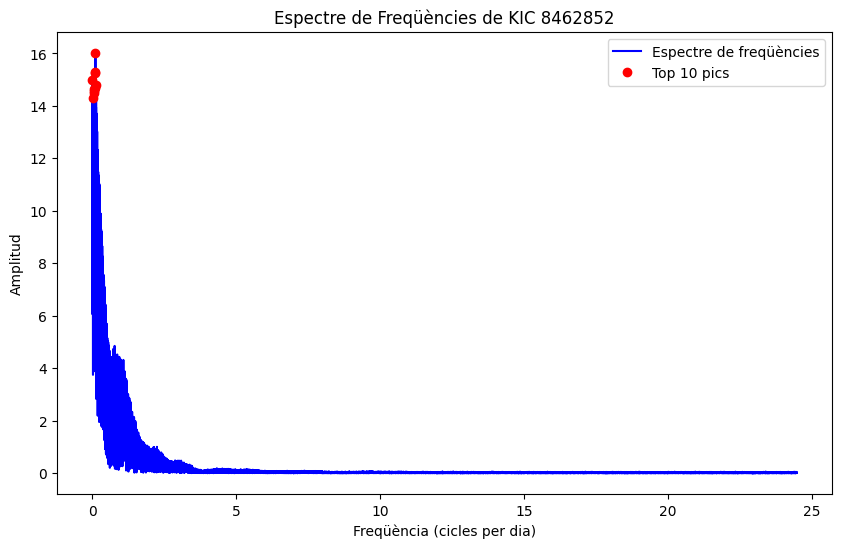

Els 10 pics més importants en el periodograma Lomb-Scargle:
Freqüència: 48.9390 1 / d cicles per dia, Potència: 0.0132
Freqüència: 97.8779 1 / d cicles per dia, Potència: 0.0100
Freqüència: 97.8766 1 / d cicles per dia, Potència: 0.0061
Freqüència: 97.8794 1 / d cicles per dia, Potència: 0.0056
Freqüència: 97.8727 1 / d cicles per dia, Potència: 0.0056
Freqüència: 97.8740 1 / d cicles per dia, Potència: 0.0055
Freqüència: 0.0013 1 / d cicles per dia, Potència: 0.0055
Freqüència: 97.8354 1 / d cicles per dia, Potència: 0.0054
Freqüència: 0.0413 1 / d cicles per dia, Potència: 0.0053
Freqüència: 97.8341 1 / d cicles per dia, Potència: 0.0052


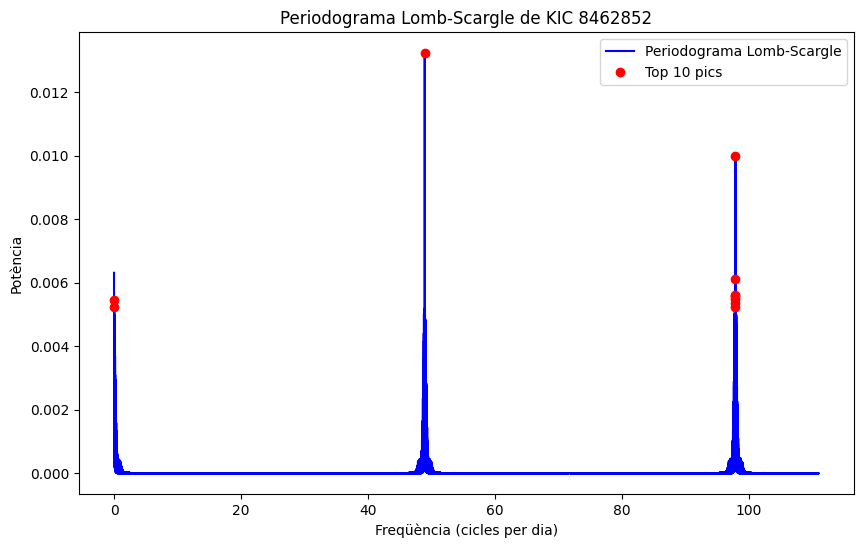

Període de transit més probable: 29.0707 dies


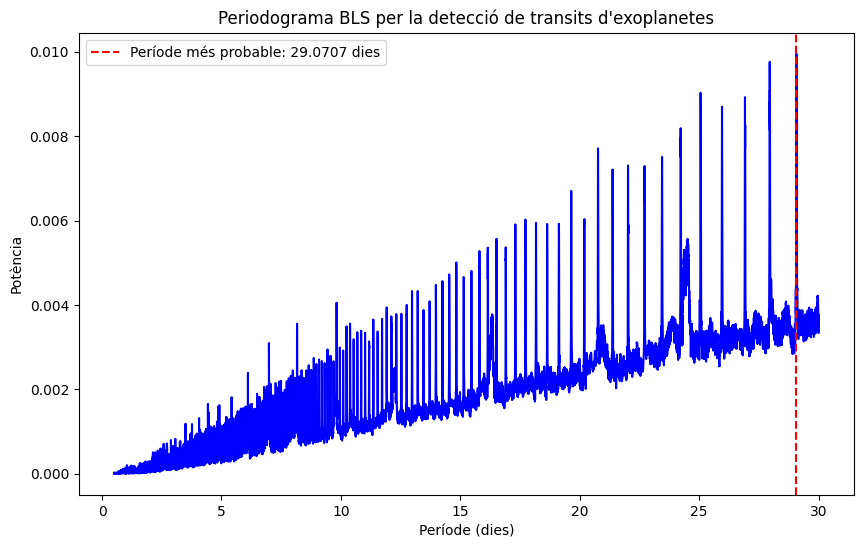

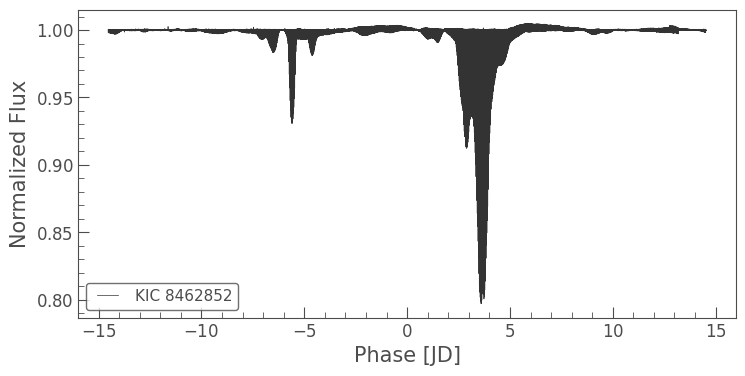


--------------------------------------------------

Anàlisi de l'estrella KIC 12557548


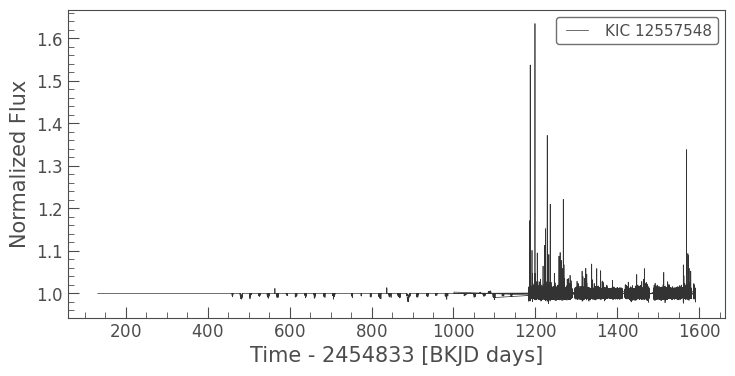

In [ ]:

# Instal·lació de Lightkurve i altres biblioteques necessàries
!pip install lightkurve numpy matplotlib scipy astropy

# Importar les biblioteques necessàries
import lightkurve as lk
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from astropy.timeseries import BoxLeastSquares, LombScargle

# Definir una llista d'estrelles per a la comparació
targets = ["KIC 8462852", "KIC 12557548", "HD 209458", "HD 189733"]

for target in targets:
    print(f"Anàlisi de l'estrella {target}")

    try:
        # Cercar arxius de corba de llum per l'estrella i descarregar tots els arxius trobats
        search_result = lk.search_lightcurve(target)
        if len(search_result) == 0:
            print(f"No s'han trobat dades per l'estrella {target}")
            continue
        lc_collection = search_result.download_all()

        # Combinar totes les corbes de llum en una única corba contínua
        lc = lc_collection.stitch()

        # Eliminar valors NaN i normalitzar la corba de llum
        lc = lc.remove_nans().normalize()

        # Eliminar tendències llargues amb un filtre Savitzky-Golay
        lc_detrended = lc.flatten(window_length=401)

        # Visualitzar la corba de llum processada
        lc_detrended.plot(title=f"Corba de llum detrended de {target}")
        plt.show()

        # Aplicar la Transformada de Fourier
        fft = np.fft.fft(lc_detrended.flux)
        frequencies = np.fft.fftfreq(len(fft), lc_detrended.time[1].value - lc_detrended.time[0].value)

        # Filtrar les freqüències positives
        positive_frequencies = frequencies[frequencies > 0]
        positive_fft = np.abs(fft[frequencies > 0])

        # Detecció de pics en l'espectre de Fourier
        peaks, _ = find_peaks(positive_fft)
        peak_frequencies = positive_frequencies[peaks]
        peak_amplitudes = positive_fft[peaks]

        # Seleccionar els 10 pics més importants (per amplitud) de la Transformada de Fourier
        top_10_peaks = np.argsort(peak_amplitudes)[-10:][::-1]
        top_10_frequencies = peak_frequencies[top_10_peaks]
        top_10_amplitudes = peak_amplitudes[top_10_peaks]

        # Mostrar valors numèrics importants de la Transformada de Fourier
        print("Els 10 pics més importants en la Transformada de Fourier:")
        for i in range(len(top_10_peaks)):
            print(f"Freqüència: {top_10_frequencies[i]:.4f} cicles per dia, Amplitud: {top_10_amplitudes[i]:.4f}")

        # Visualitzar l'espectre de freqüències amb els 10 pics més importants marcats
        plt.figure(figsize=(10, 6))
        plt.plot(positive_frequencies, positive_fft, color='blue', label='Espectre de freqüències')
        plt.plot(top_10_frequencies, top_10_amplitudes, 'ro', label='Top 10 pics')
        plt.xlabel("Freqüència (cicles per dia)")
        plt.ylabel("Amplitud")
        plt.title(f"Espectre de Freqüències de {target}")
        plt.legend()
        plt.show()

        # Aplicar el periodograma Lomb-Scargle
        ls = LombScargle(lc_detrended.time, lc_detrended.flux)
        frequency, power = ls.autopower()

        # Detecció de pics en el periodograma Lomb-Scargle
        peaks_ls, _ = find_peaks(power)
        peak_frequencies_ls = frequency[peaks_ls]
        peak_powers_ls = power[peaks_ls]

        # Seleccionar els 10 pics més importants (per potència) del periodograma Lomb-Scargle
        top_10_peaks_ls = np.argsort(peak_powers_ls)[-10:][::-1]
        top_10_frequencies_ls = peak_frequencies_ls[top_10_peaks_ls]
        top_10_powers_ls = peak_powers_ls[top_10_peaks_ls]

        # Mostrar valors numèrics importants del periodograma Lomb-Scargle
        print("Els 10 pics més importants en el periodograma Lomb-Scargle:")
        for i in range(len(top_10_peaks_ls)):
            print(f"Freqüència: {top_10_frequencies_ls[i]:.4f} cicles per dia, Potència: {top_10_powers_ls[i]:.4f}")

        # Visualitzar el periodograma Lomb-Scargle amb els 10 pics més importants marcats
        plt.figure(figsize=(10, 6))
        plt.plot(frequency, power, color='blue', label='Periodograma Lomb-Scargle')
        plt.plot(top_10_frequencies_ls, top_10_powers_ls, 'ro', label='Top 10 pics')
        plt.xlabel("Freqüència (cicles per dia)")
        plt.ylabel("Potència")
        plt.title(f"Periodograma Lomb-Scargle de {target}")
        plt.legend()
        plt.show()

        # Detecció de transits d'exoplanetes amb el Box Least Squares (BLS)
        bls = BoxLeastSquares(lc_detrended.time, lc_detrended.flux)
        periods = np.linspace(0.5, 30, 10000)
        bls_power = bls.power(periods, 0.2)
        best_period = bls_power.period[np.argmax(bls_power.power)]

        # Convertir el període a dies si cal
        best_period_days = best_period.to_value('day')

        # Mostrar el període del transit més probable
        print(f"Període de transit més probable: {best_period_days:.4f} dies")

        # Visualitzar el periodograma BLS
        plt.figure(figsize=(10, 6))
        plt.plot(bls_power.period.to_value('day'), bls_power.power, color='blue')
        plt.xlabel("Període (dies)")
        plt.ylabel("Potència")
        plt.title("Periodograma BLS per la detecció de transits d'exoplanetes")
        plt.axvline(best_period_days, color='red', linestyle='--', label=f"Període més probable: {best_period_days:.4f} dies")
        plt.legend()
        plt.show()

        # Fasejar la corba de llum segons el període de transit més probable
        lc_folded = lc_detrended.fold(period=best_period_days)
        lc_folded.plot()
        plt.show()

    except Exception as e:
        print(f"Ha ocorregut un error en analitzar l'estrella {target}: {e}")

    print("\n" + "-"*50 + "\n")